In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv("data/kc_house_data.csv")

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
sorted(df.columns)

['bathrooms',
 'bedrooms',
 'condition',
 'date',
 'floors',
 'grade',
 'id',
 'lat',
 'long',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_living15',
 'sqft_lot',
 'sqft_lot15',
 'view',
 'waterfront',
 'yr_built',
 'yr_renovated',
 'zipcode']

# Exploratory Data Analysis


In [4]:
# comment = 
"""
Feature Columns
id             - Unique ID for each home sold
date           - Date of the home sale
price          - Price of each home sold
bedrooms       - Number of bedrooms
bathrooms      - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living    - Square footage of the apartments interior living space
sqft_lot       - Square footage of the land space
floors         - Number of floors
waterfront     - A dummy variable for whether the apartment was overlooking the waterfront or not
view           - An index from 0 to 4 of how good the view of the property was
condition      - An index from 1 to 5 on the condition of the apartment,
grade          - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above     - The square footage of the interior housing space that is above ground level
sqft_basement  - The square footage of the interior housing space that is below ground level
yr_built       - The year the house was initially built
yr_renovated   - The year of the house’s last renovation
zipcode        - What zipcode area the house is in
lat            - Lattitude
long           - Longitude
sqft_living15  - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15     - The square footage of the land lots of the nearest 15 neighbors
"""

'\nFeature Columns\nid             - Unique ID for each home sold\ndate           - Date of the home sale\nprice          - Price of each home sold\nbedrooms       - Number of bedrooms\nbathrooms      - Number of bathrooms, where .5 accounts for a room with a toilet but no shower\nsqft_living    - Square footage of the apartments interior living space\nsqft_lot       - Square footage of the land space\nfloors         - Number of floors\nwaterfront     - A dummy variable for whether the apartment was overlooking the waterfront or not\nview           - An index from 0 to 4 of how good the view of the property was\ncondition      - An index from 1 to 5 on the condition of the apartment,\ngrade          - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.\nsqft_above     - The square footage of the interior housing space that is above ground leve

# data frame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# check null values

In [6]:
for col in df.columns:
    f1 = df[col].isnull()
    print(f"{col}, \t null percentage = {round(len(df[f1])/len(df)*100,2)} ")

id, 	 null percentage = 0.0 
date, 	 null percentage = 0.0 
price, 	 null percentage = 0.0 
bedrooms, 	 null percentage = 0.0 
bathrooms, 	 null percentage = 0.0 
sqft_living, 	 null percentage = 0.0 
sqft_lot, 	 null percentage = 0.0 
floors, 	 null percentage = 0.0 
waterfront, 	 null percentage = 0.0 
view, 	 null percentage = 0.0 
condition, 	 null percentage = 0.0 
grade, 	 null percentage = 0.0 
sqft_above, 	 null percentage = 0.0 
sqft_basement, 	 null percentage = 0.0 
yr_built, 	 null percentage = 0.0 
yr_renovated, 	 null percentage = 0.0 
zipcode, 	 null percentage = 0.0 
lat, 	 null percentage = 0.0 
long, 	 null percentage = 0.0 
sqft_living15, 	 null percentage = 0.0 
sqft_lot15, 	 null percentage = 0.0 


# check duplicates

In [7]:
# check duplicates
for col in df.columns:
    f1 = df.duplicated(subset=[col])
    print(f"{col}, \t duplicated percentage = {round(len(df[f1])/len(df)*100,2)} ")

id, 	 duplicated percentage = 0.82 
date, 	 duplicated percentage = 98.28 
price, 	 duplicated percentage = 81.36 
bedrooms, 	 duplicated percentage = 99.94 
bathrooms, 	 duplicated percentage = 99.86 
sqft_living, 	 duplicated percentage = 95.2 
sqft_lot, 	 duplicated percentage = 54.74 
floors, 	 duplicated percentage = 99.97 
waterfront, 	 duplicated percentage = 99.99 
view, 	 duplicated percentage = 99.98 
condition, 	 duplicated percentage = 99.98 
grade, 	 duplicated percentage = 99.94 
sqft_above, 	 duplicated percentage = 95.62 
sqft_basement, 	 duplicated percentage = 98.58 
yr_built, 	 duplicated percentage = 99.46 
yr_renovated, 	 duplicated percentage = 99.68 
zipcode, 	 duplicated percentage = 99.68 
lat, 	 duplicated percentage = 76.71 
long, 	 duplicated percentage = 96.52 
sqft_living15, 	 duplicated percentage = 96.4 
sqft_lot15, 	 duplicated percentage = 59.8 


In [8]:
len(set(df['price']))/len(df)*100

18.636931476426223

In [9]:
len(set(df['yr_built']))/len(df)*100

0.5367140147133669

In [10]:
set(df['condition'])

{1, 2, 3, 4, 5}

In [11]:
# check values

for col in df.columns:
    v = df.iloc[0][col]
    print(f"{col}, \t {v}")


id, 	 7129300520
date, 	 20141013T000000
price, 	 221900.0
bedrooms, 	 3
bathrooms, 	 1.0
sqft_living, 	 1180
sqft_lot, 	 5650
floors, 	 1.0
waterfront, 	 0
view, 	 0
condition, 	 3
grade, 	 7
sqft_above, 	 1180
sqft_basement, 	 0
yr_built, 	 1955
yr_renovated, 	 0
zipcode, 	 98178
lat, 	 47.5112
long, 	 -122.257
sqft_living15, 	 1340
sqft_lot15, 	 5650


# need to fix date

In [12]:
df['date'] = [x[0:9] for x in df['date']]

df['date'] = pd.to_datetime(df['date'] )

# extract year, month, quarter
df['year']   = df['date'].dt.year
df['month']  = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter


# need drop values, not useful for ML

In [13]:
df.drop(columns=['id','date'], inplace=True)

# continuous variables

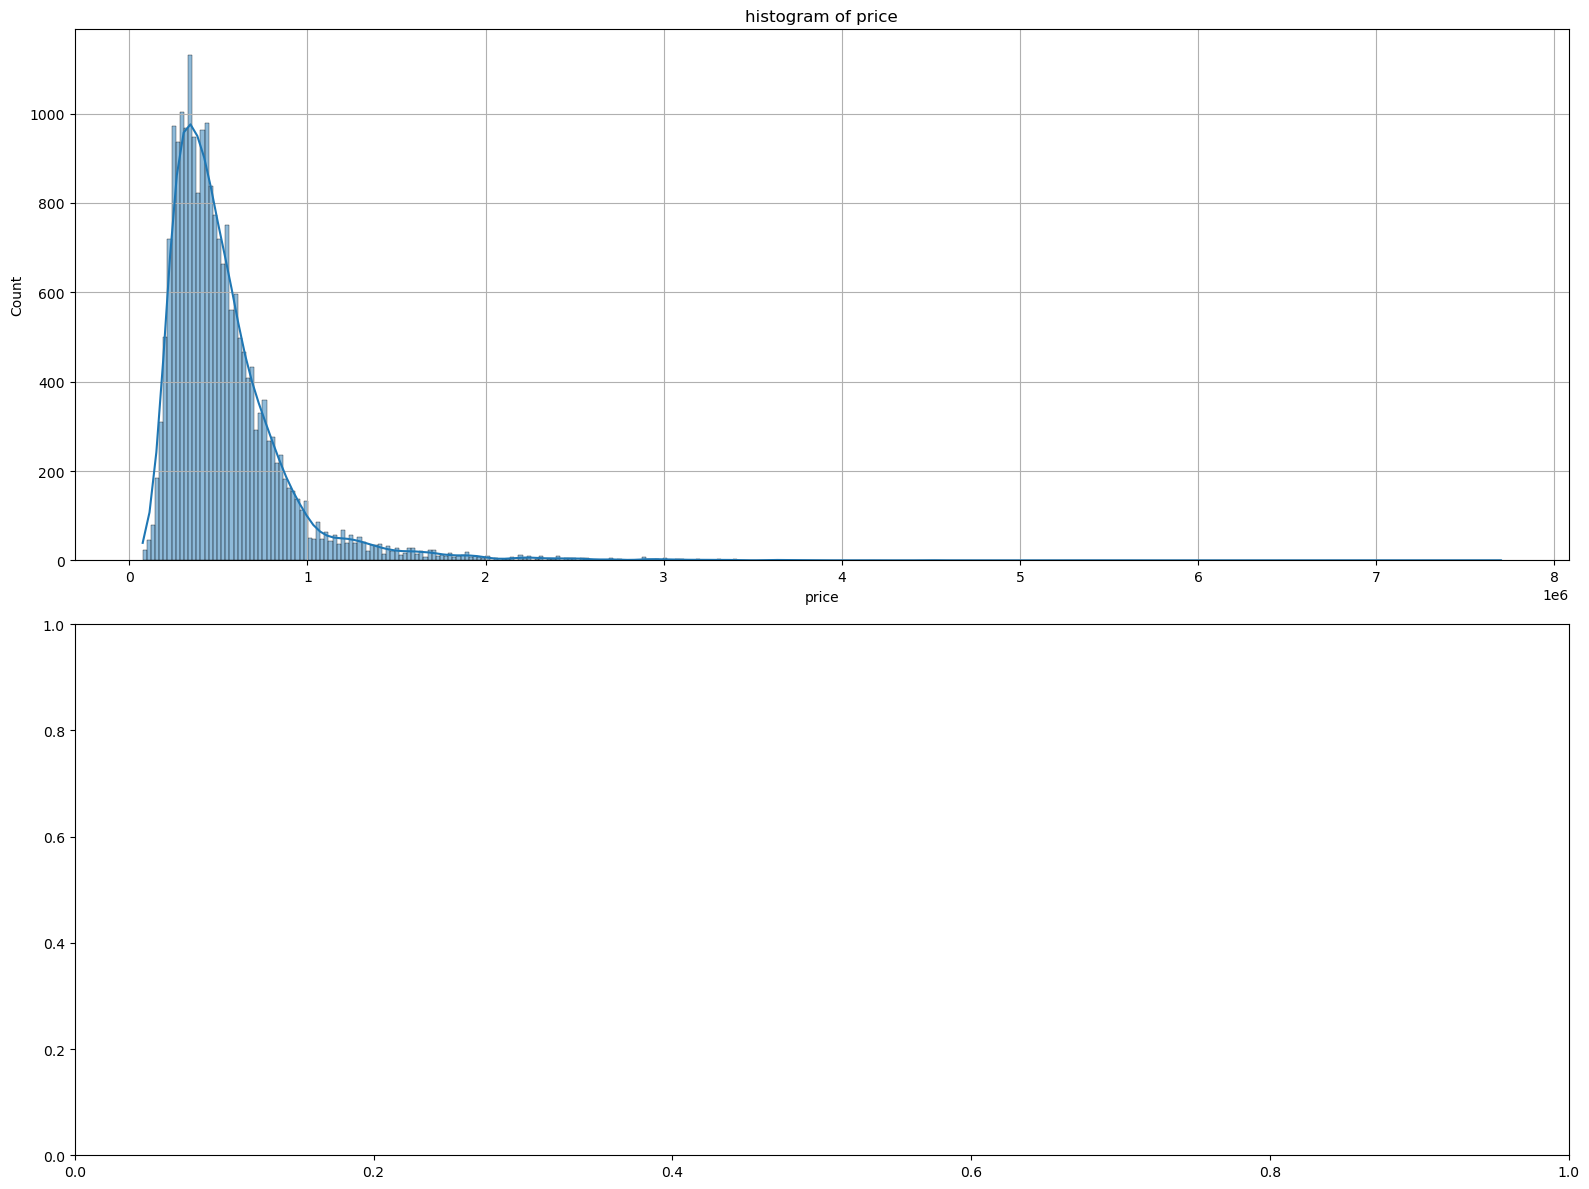

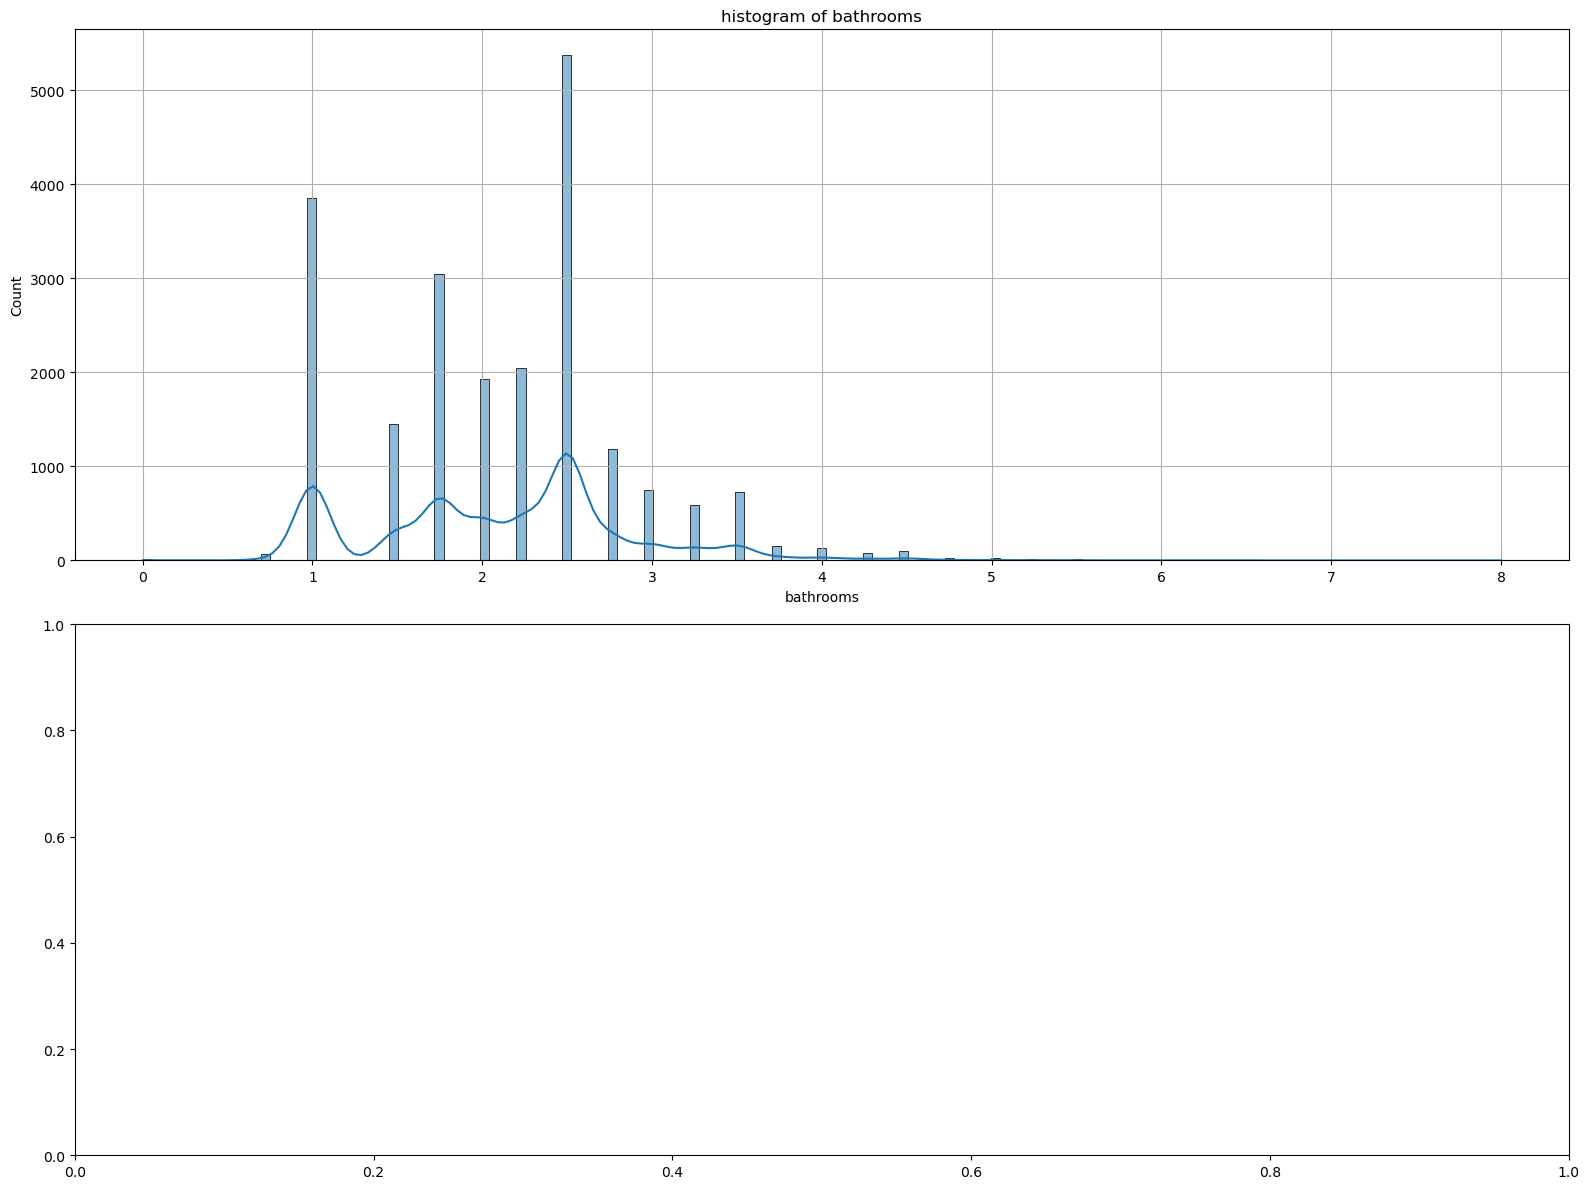

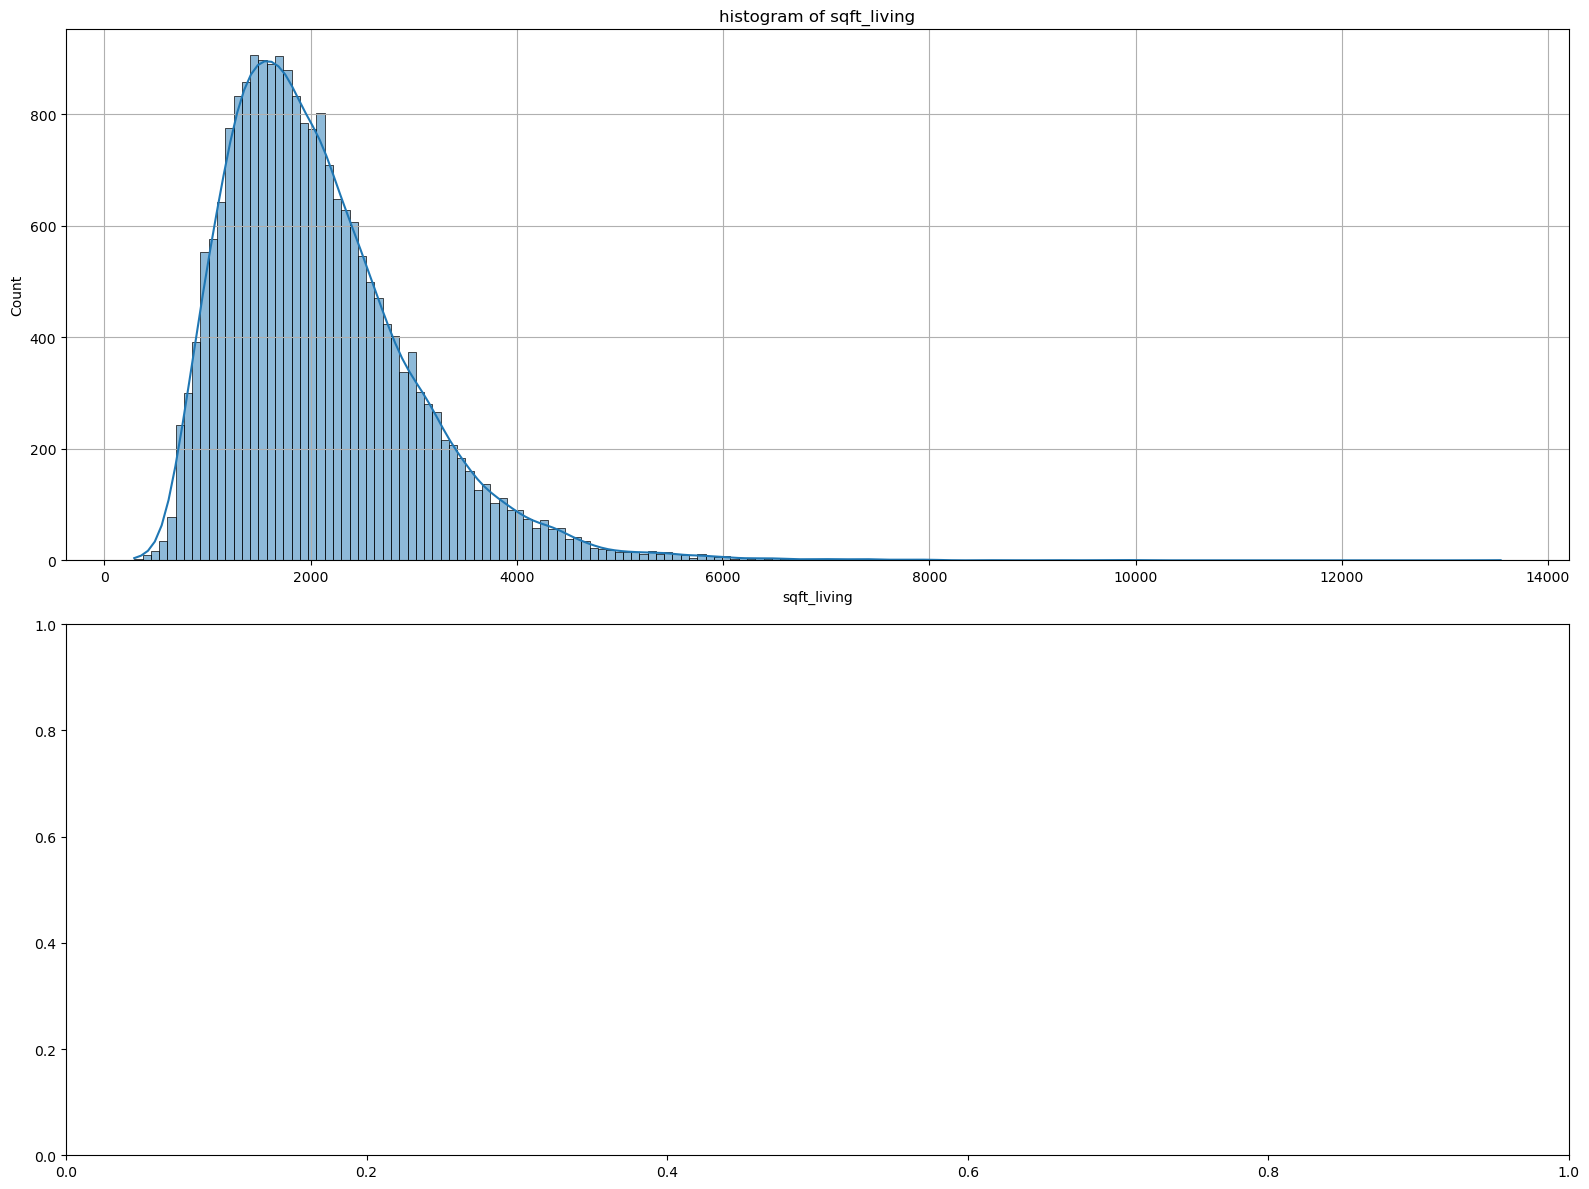

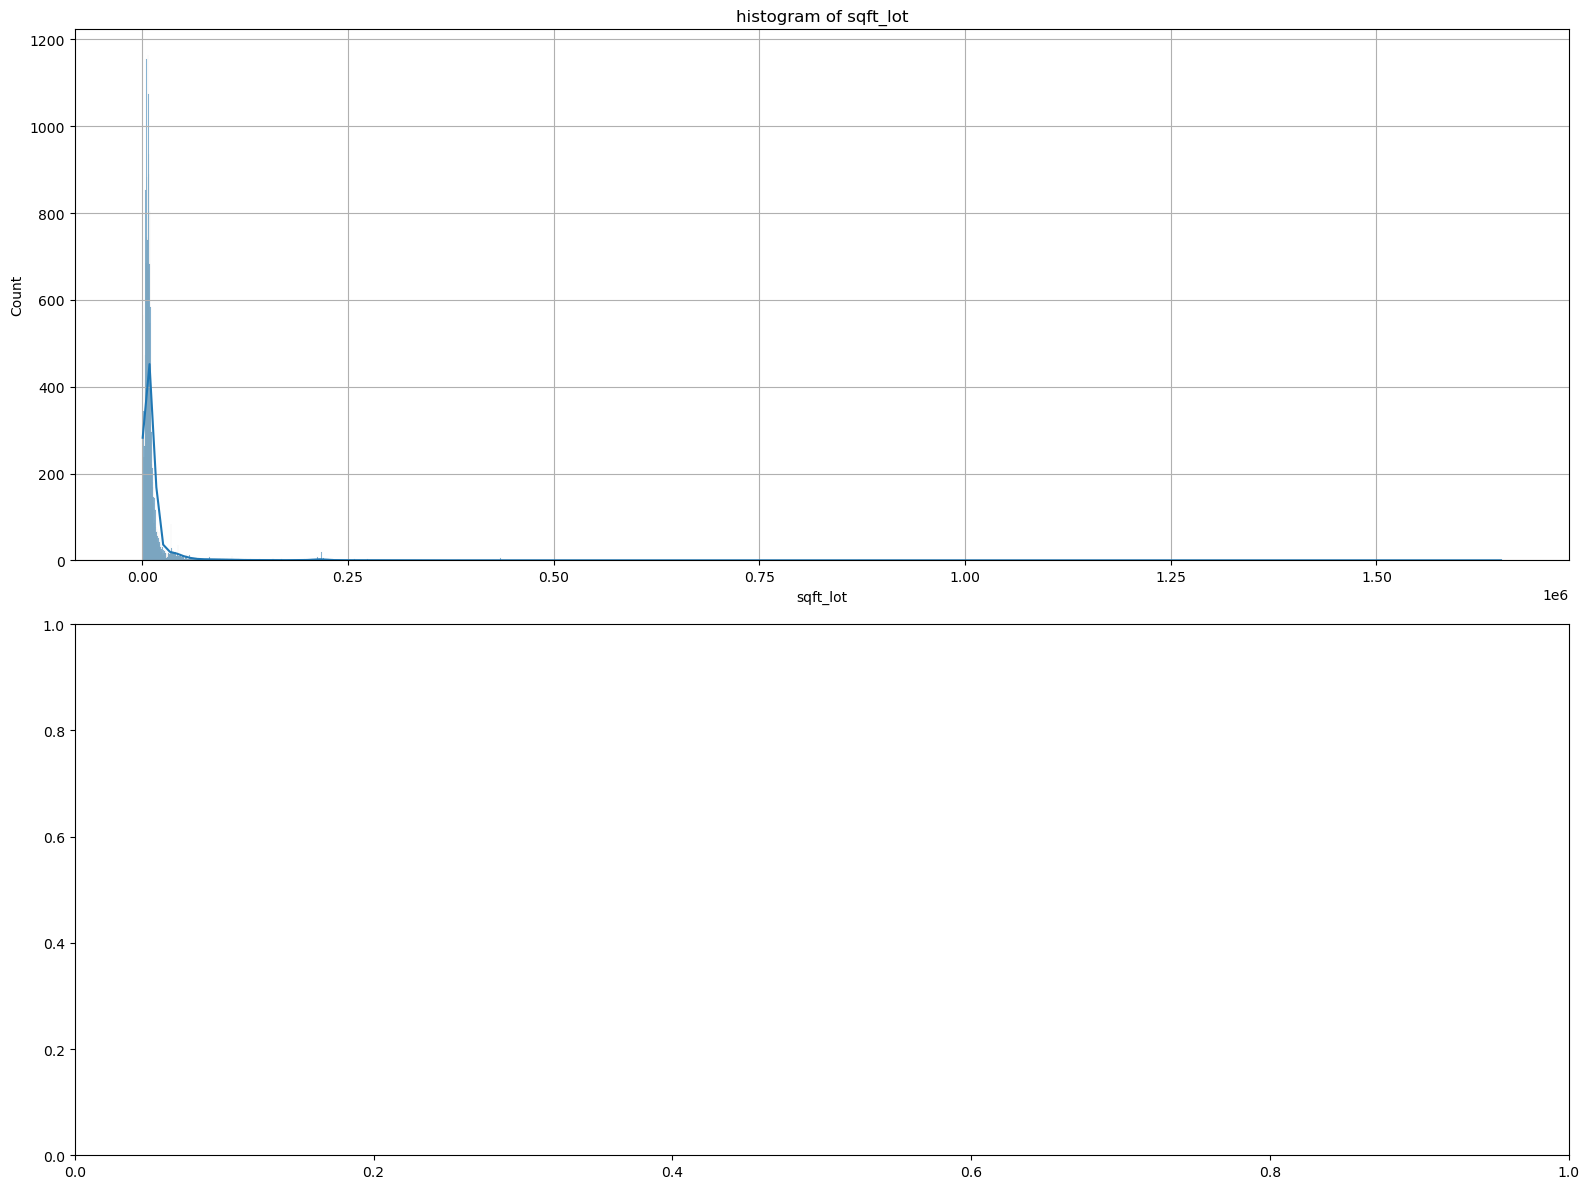

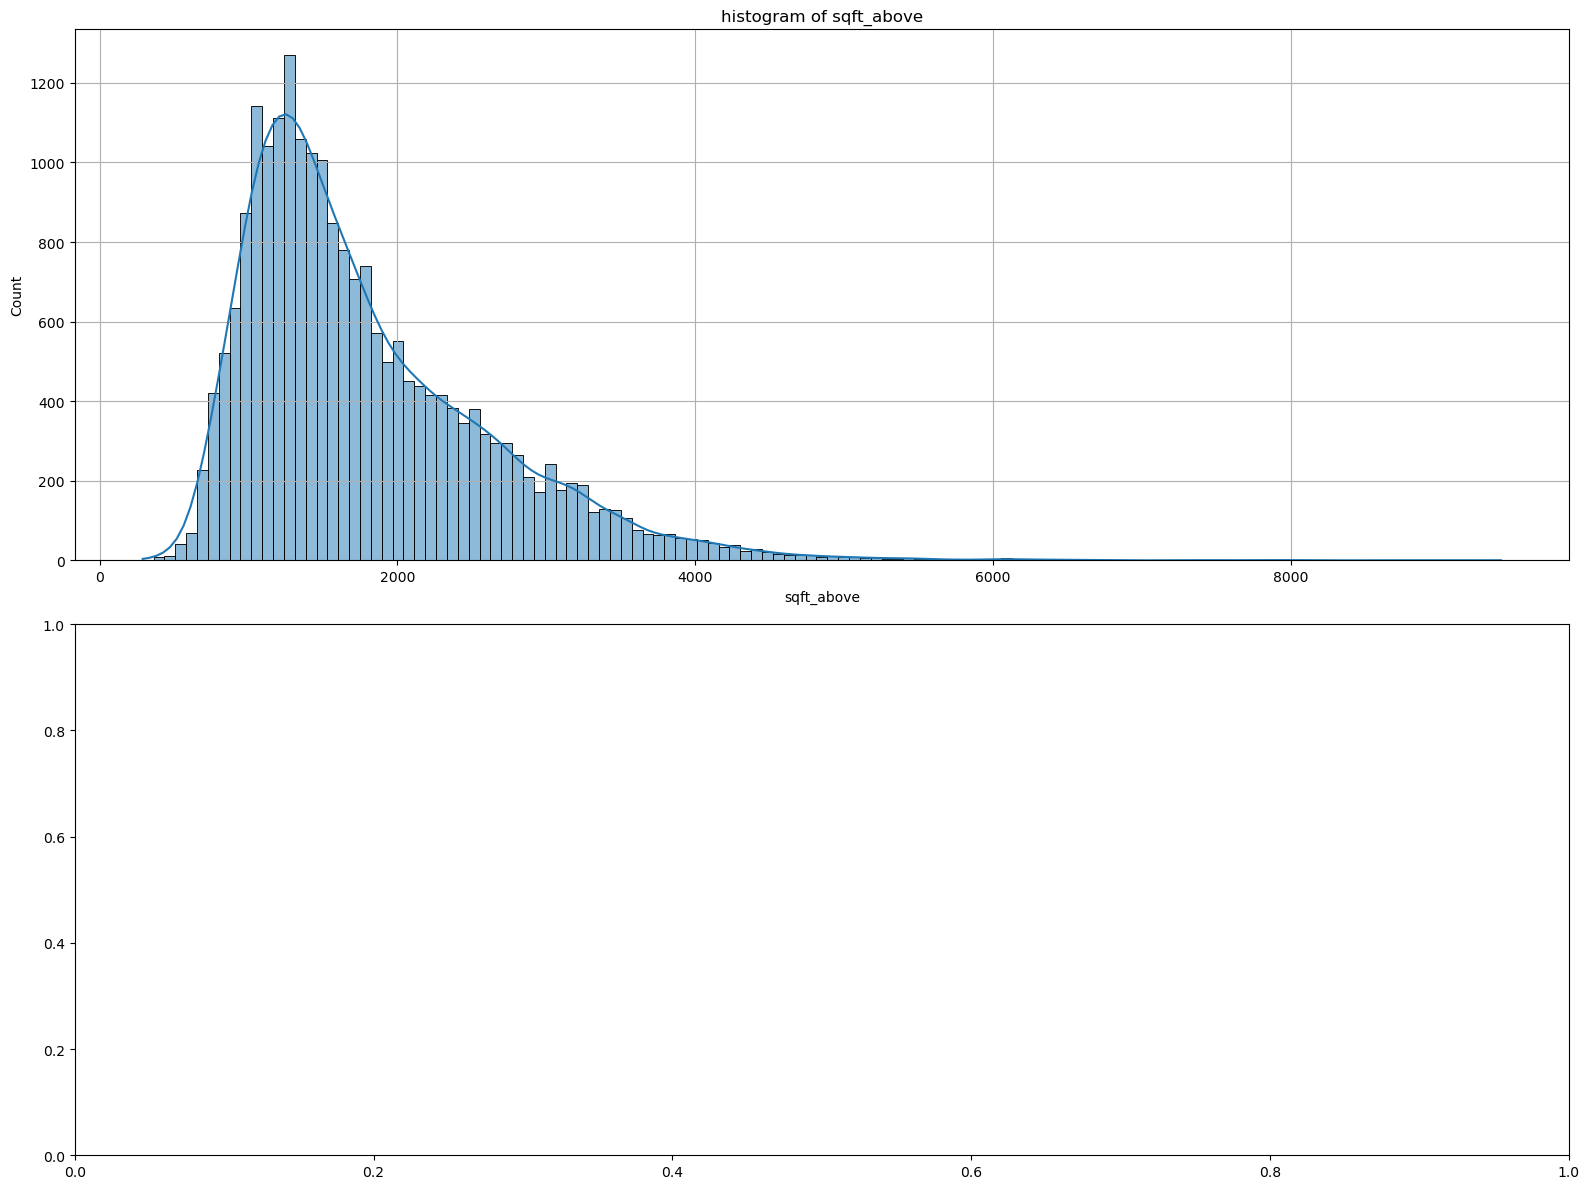

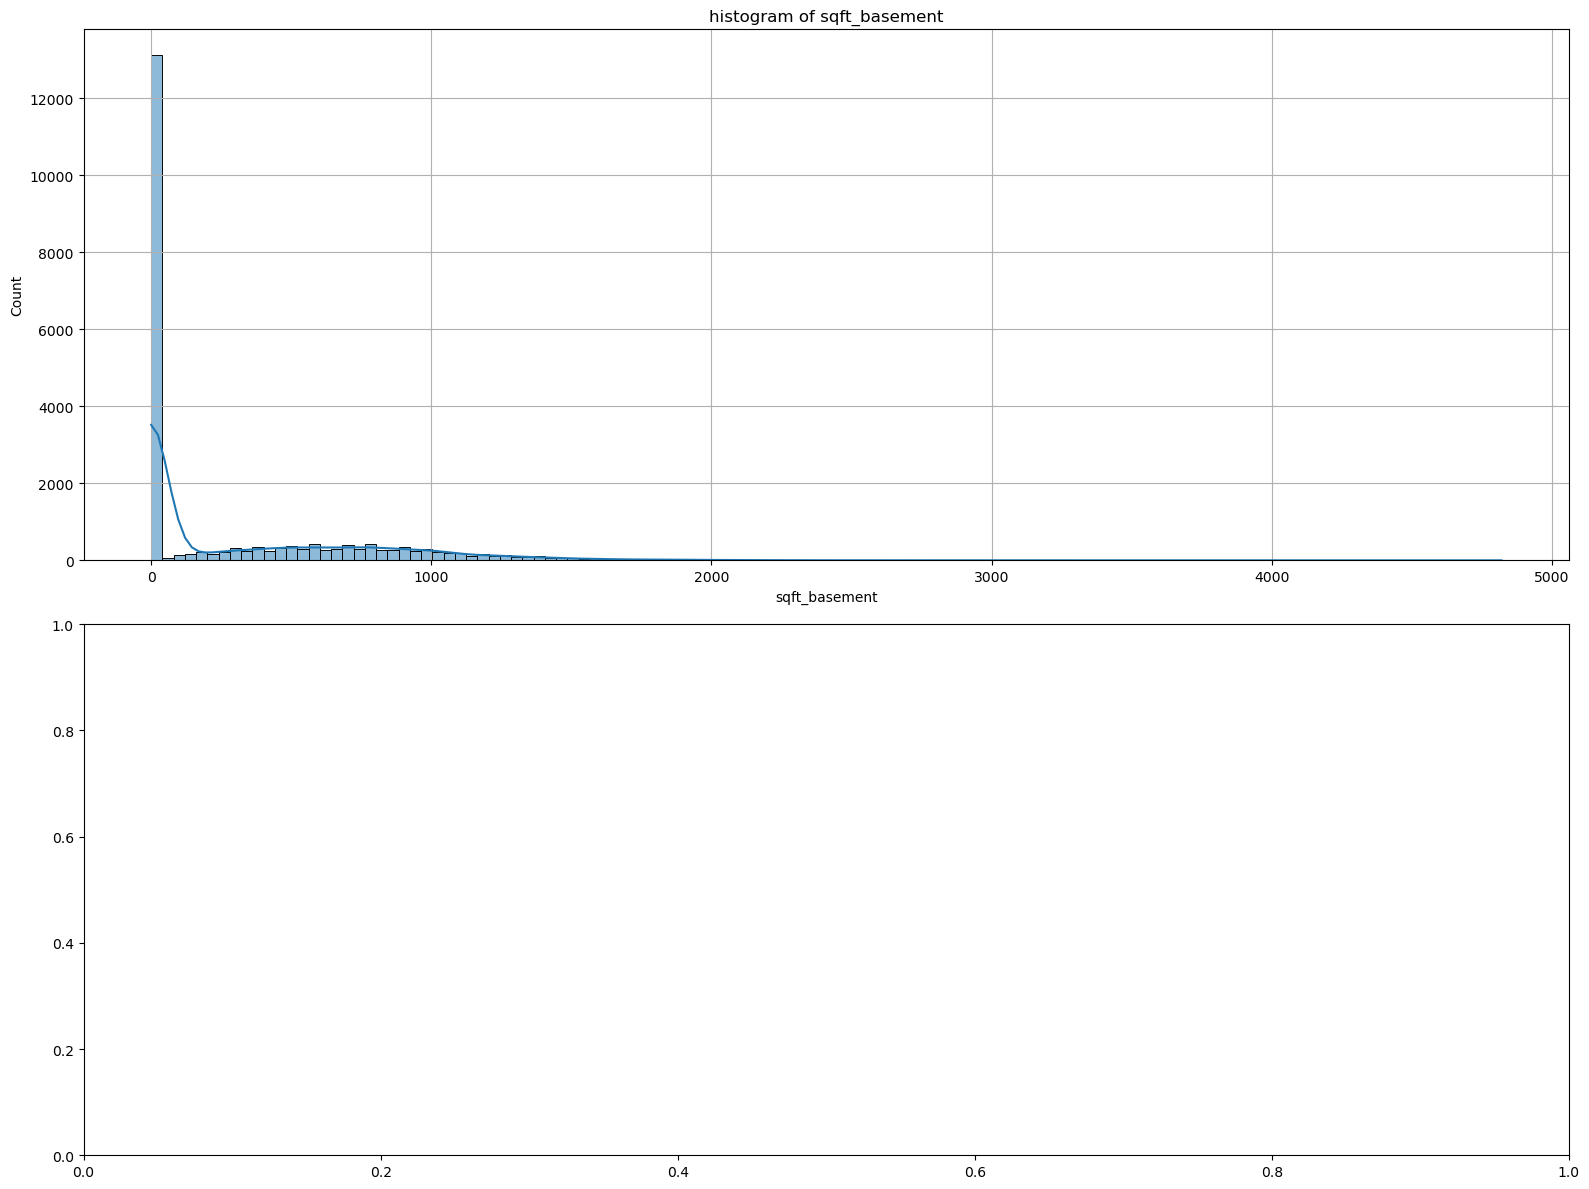

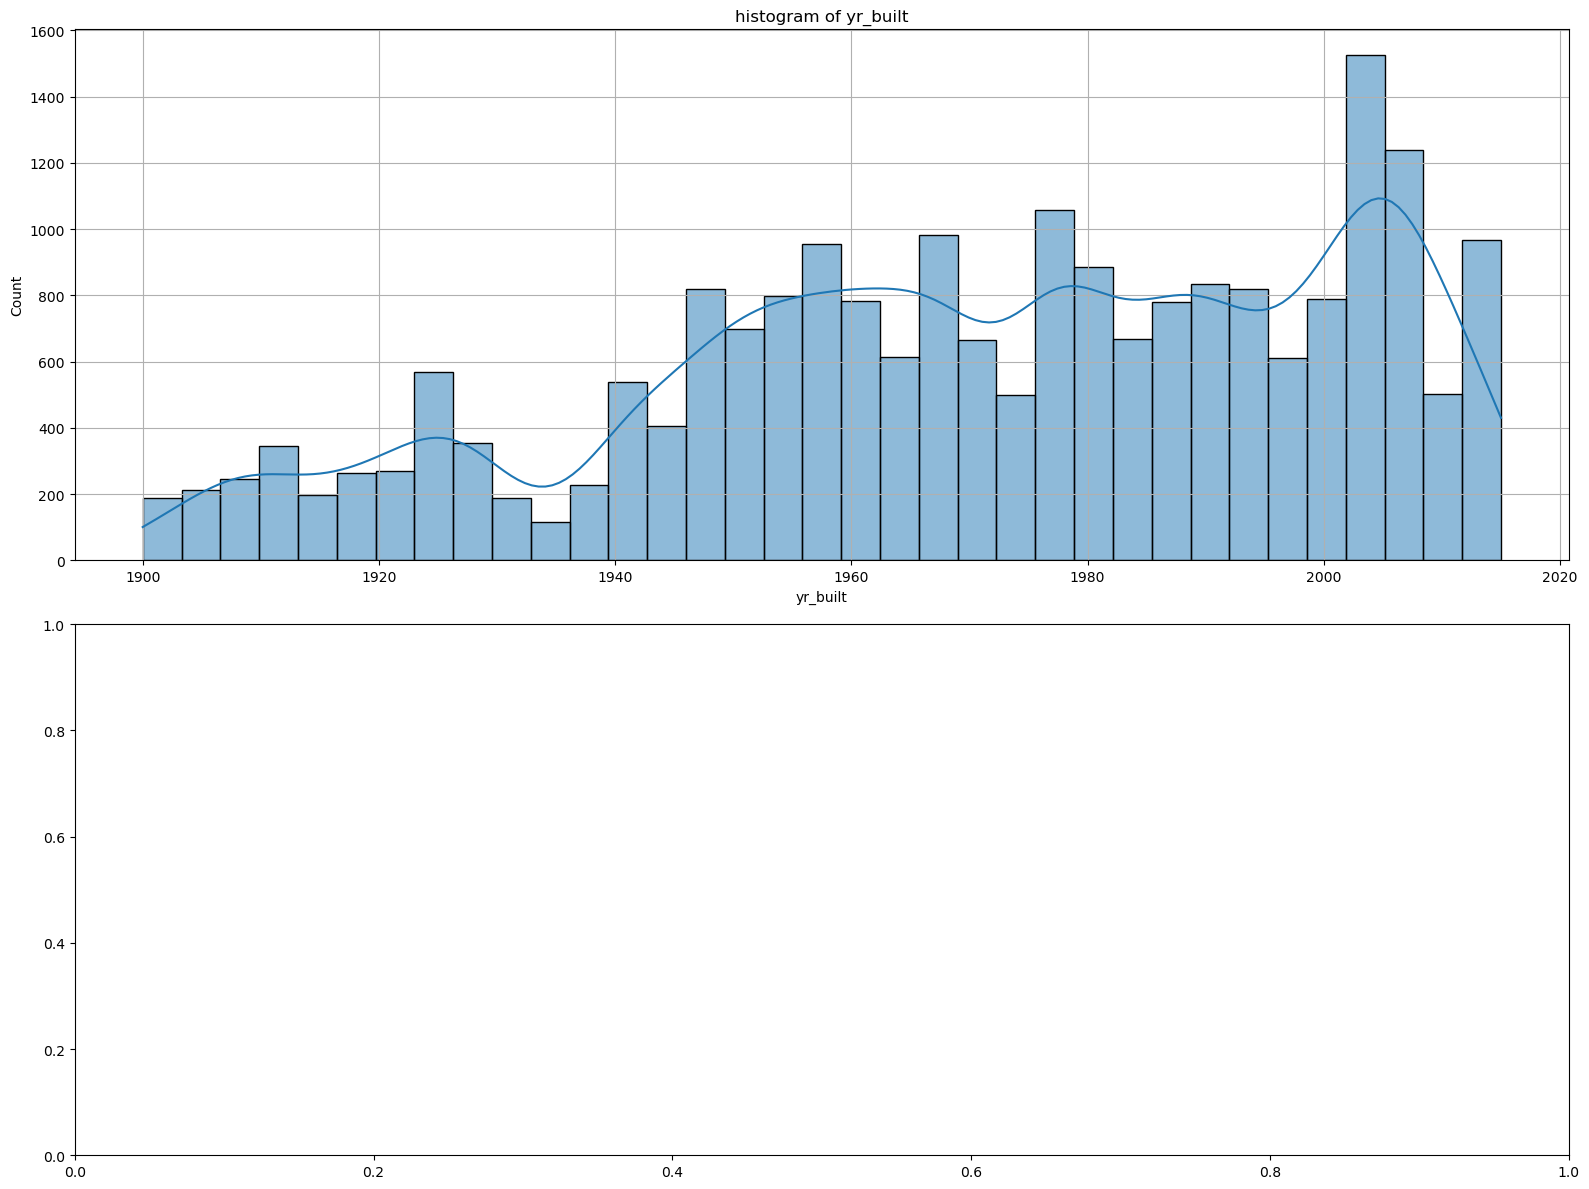

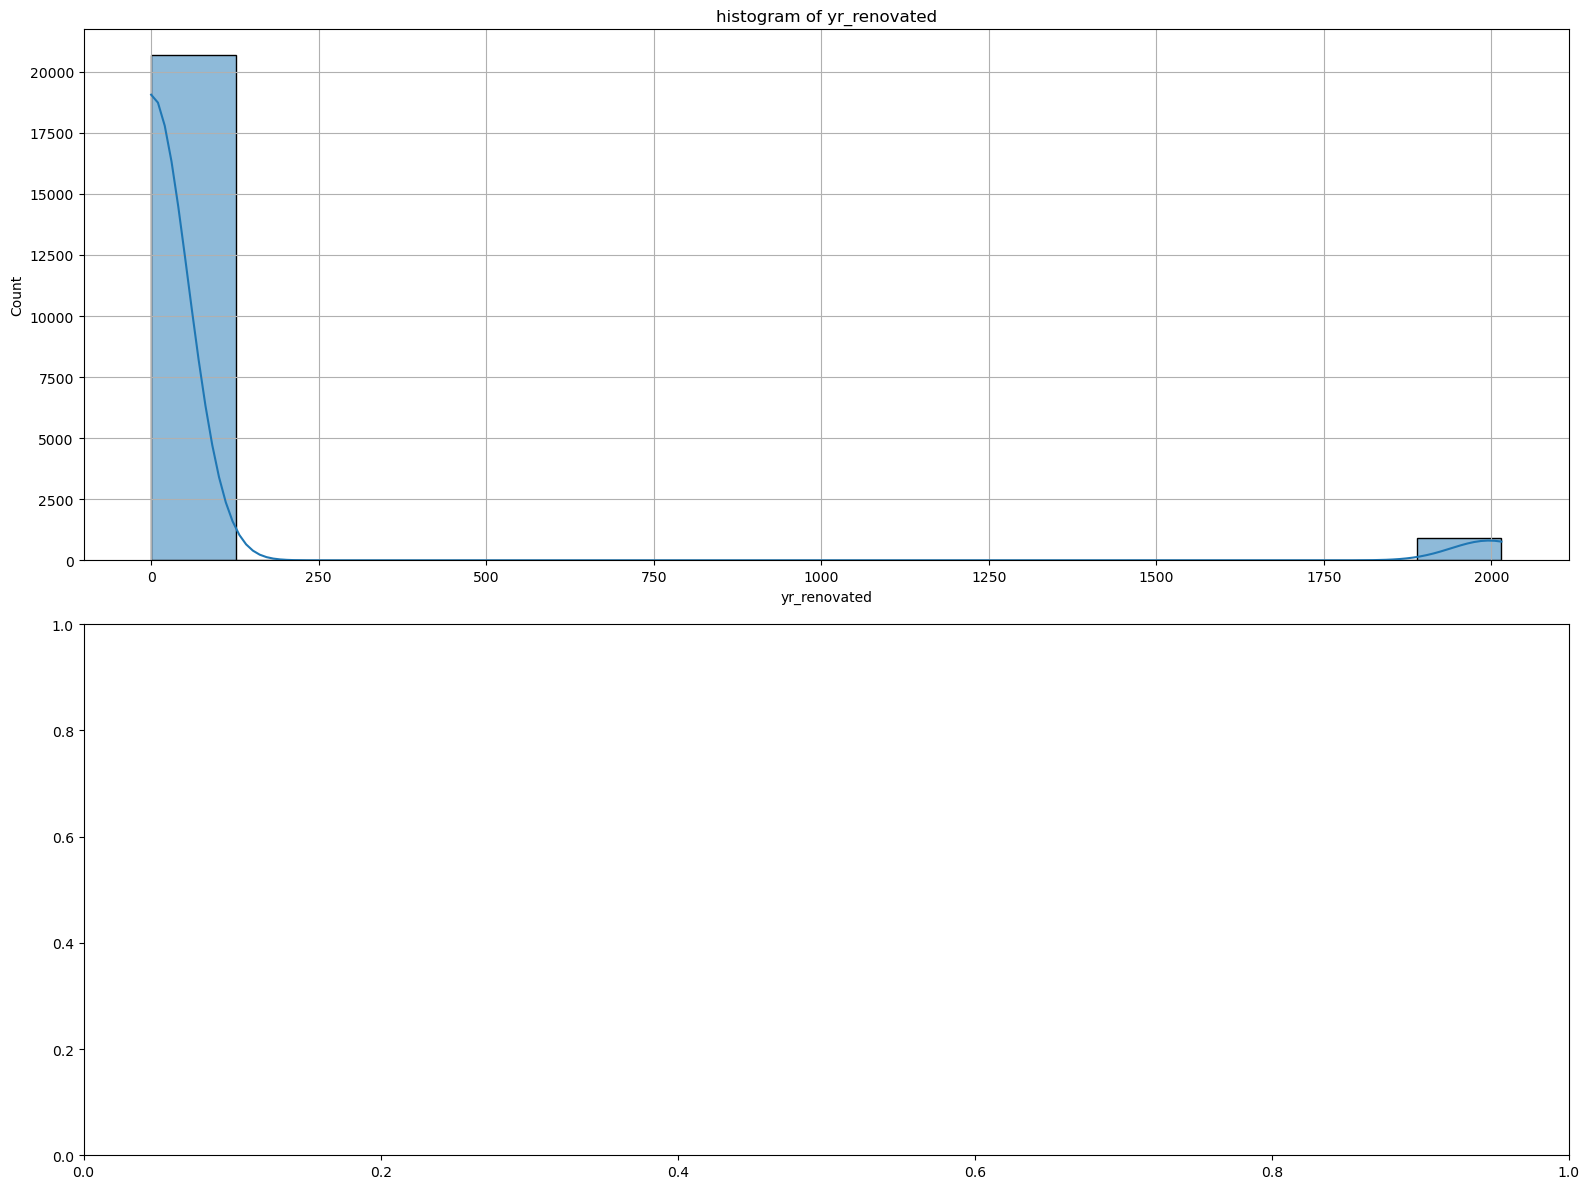

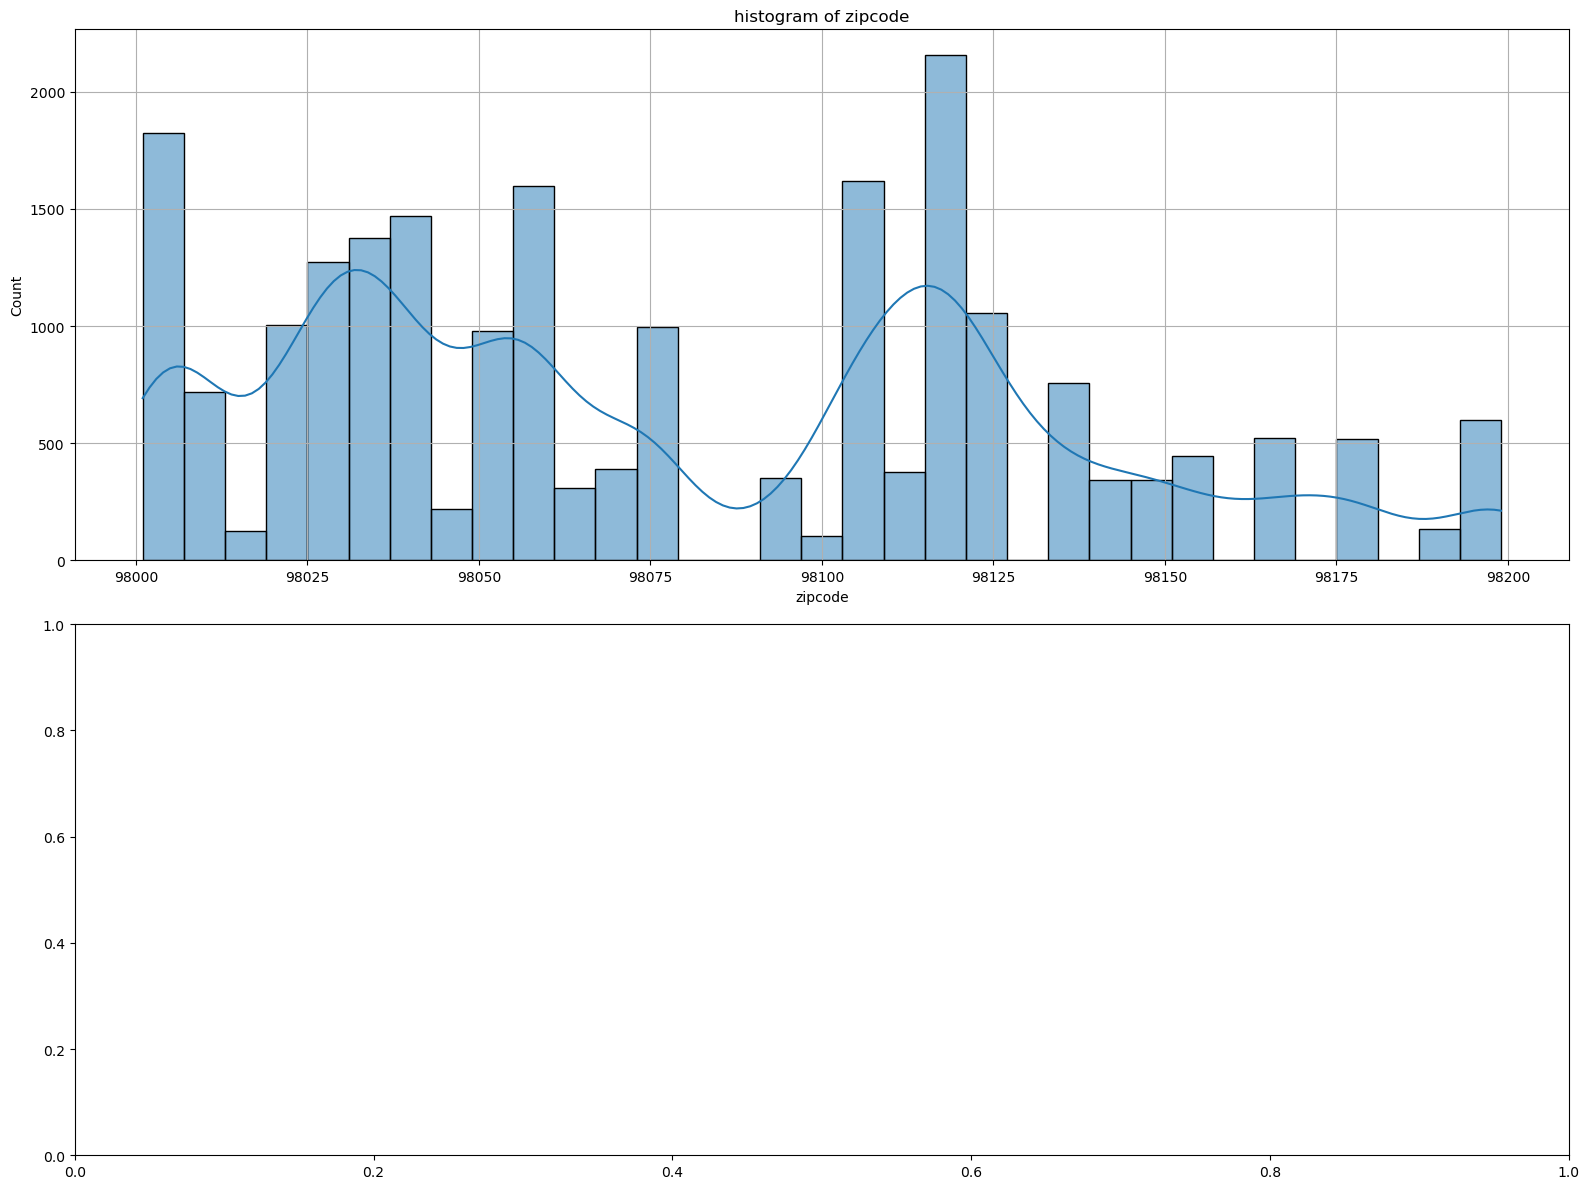

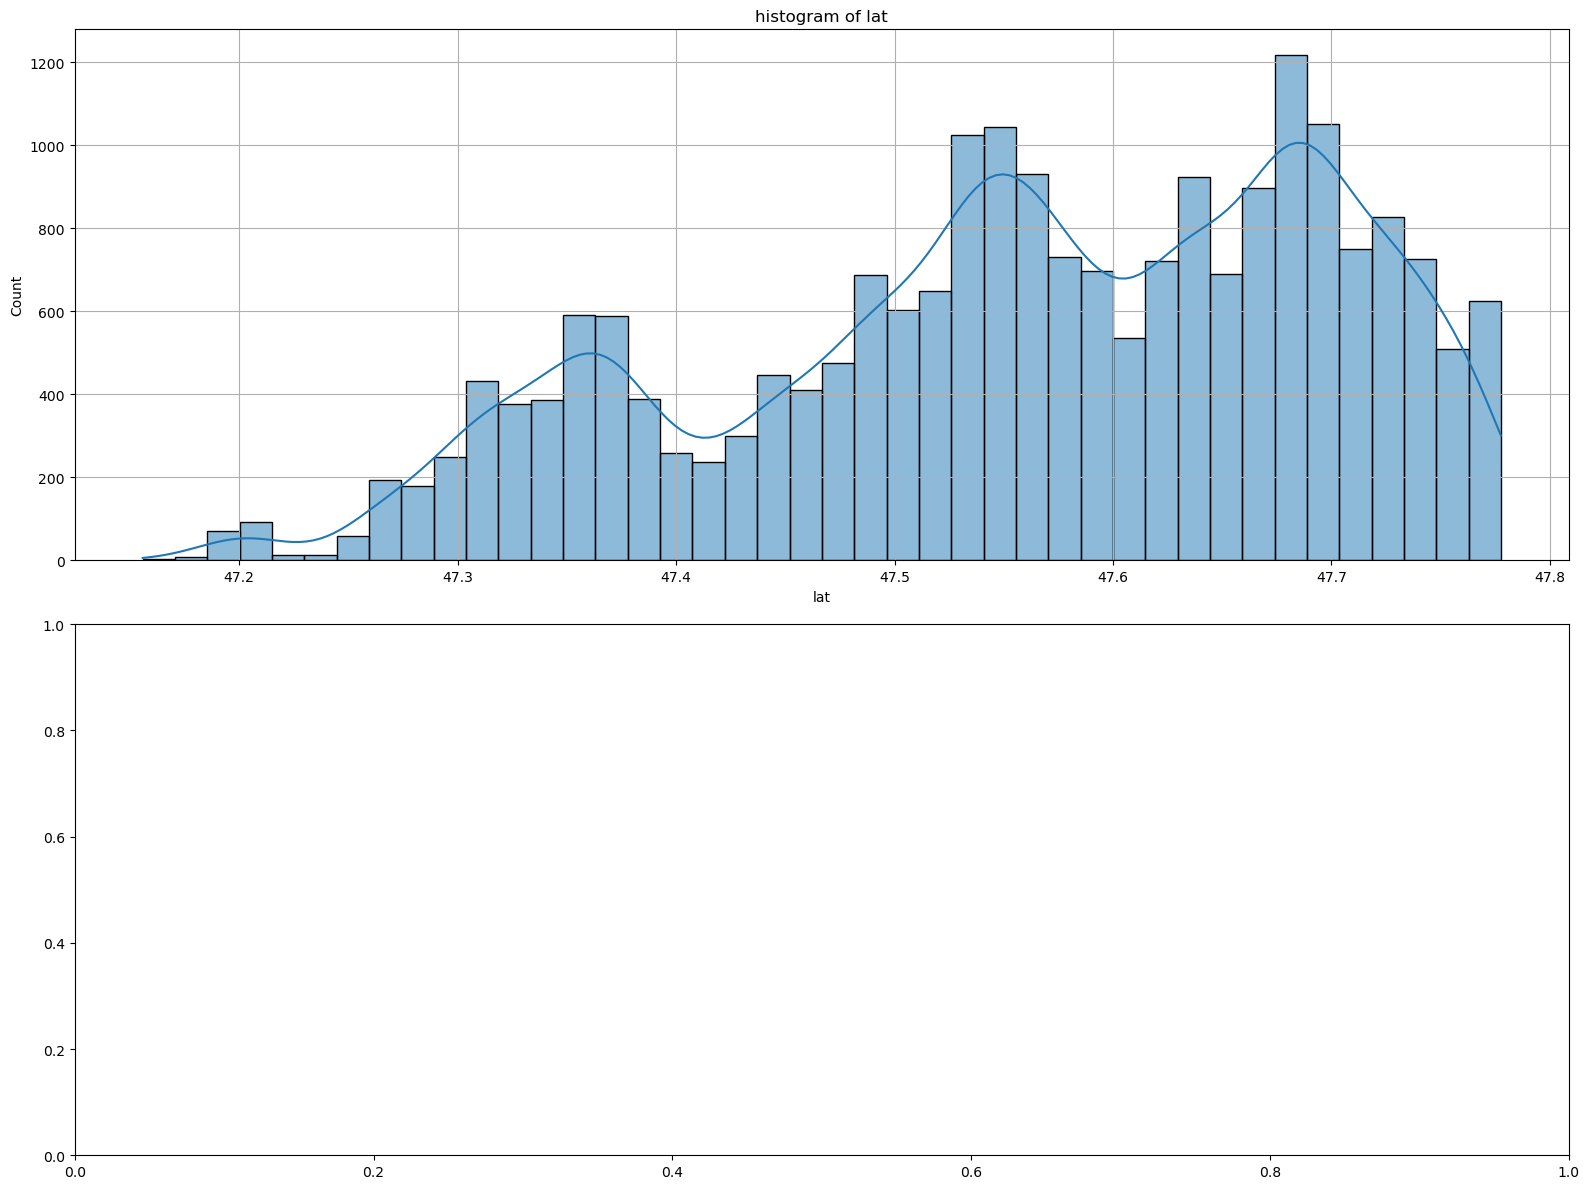

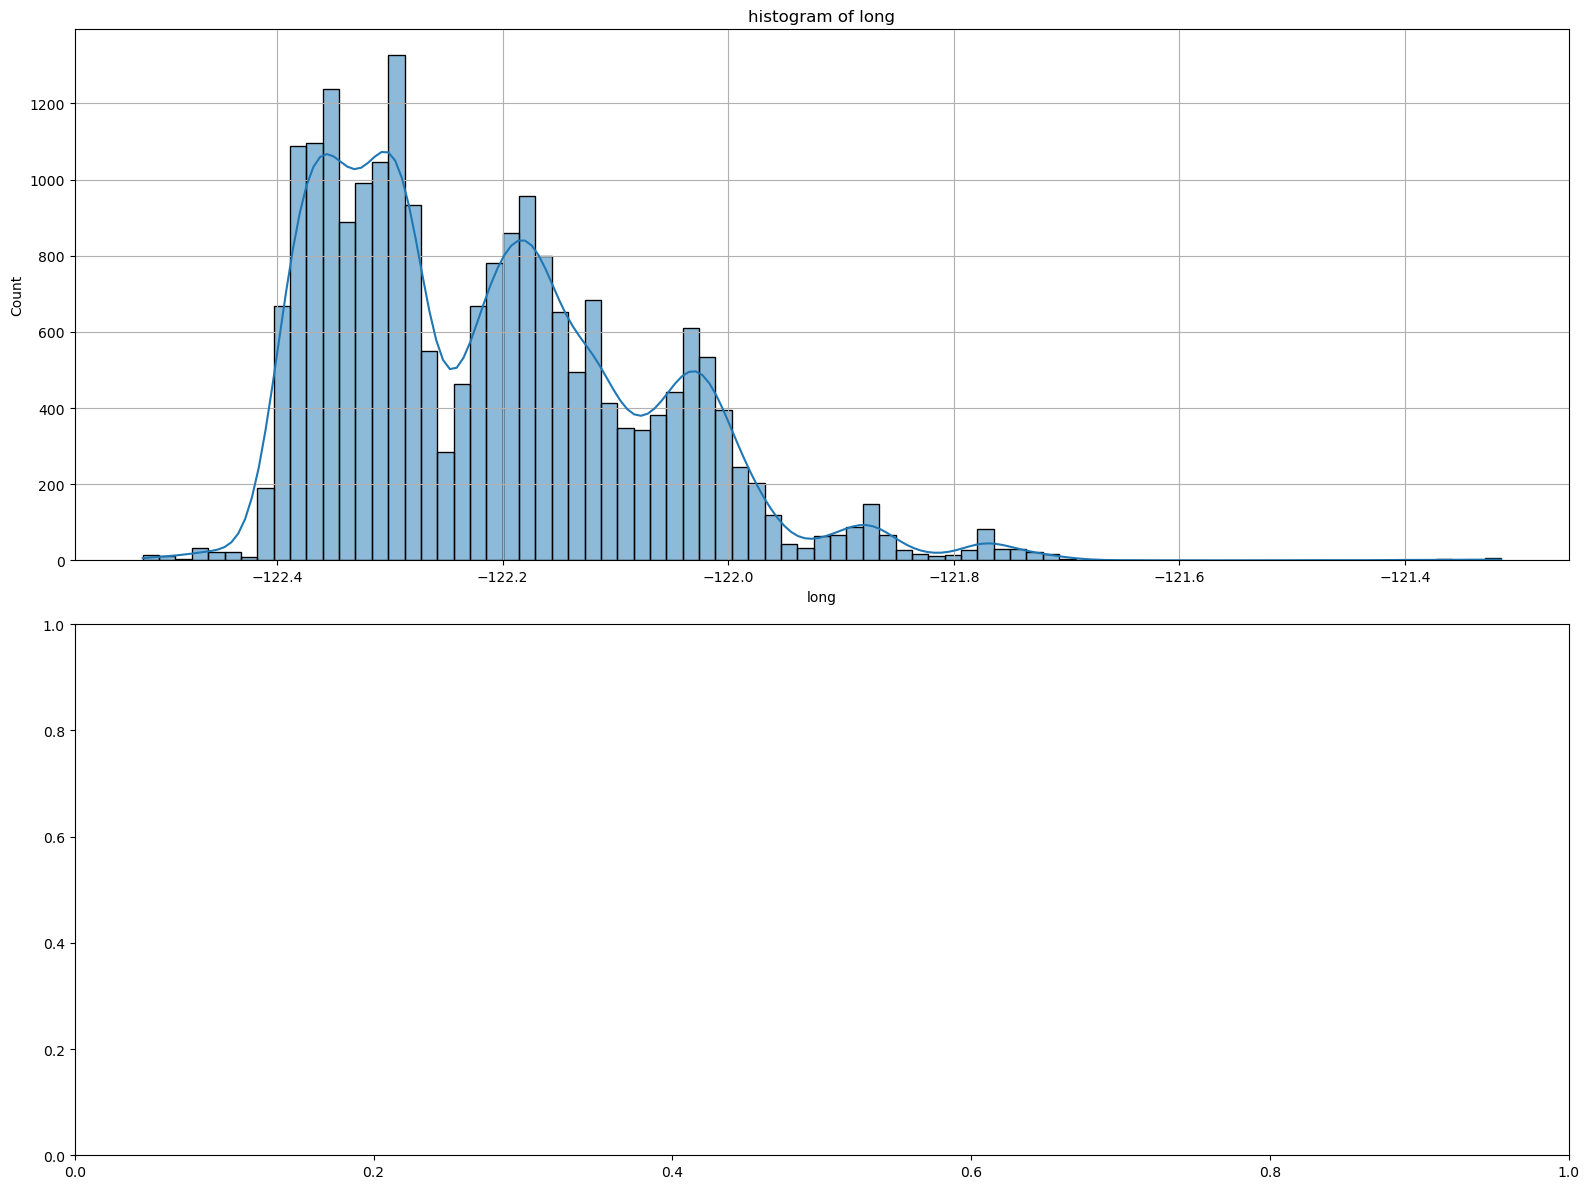

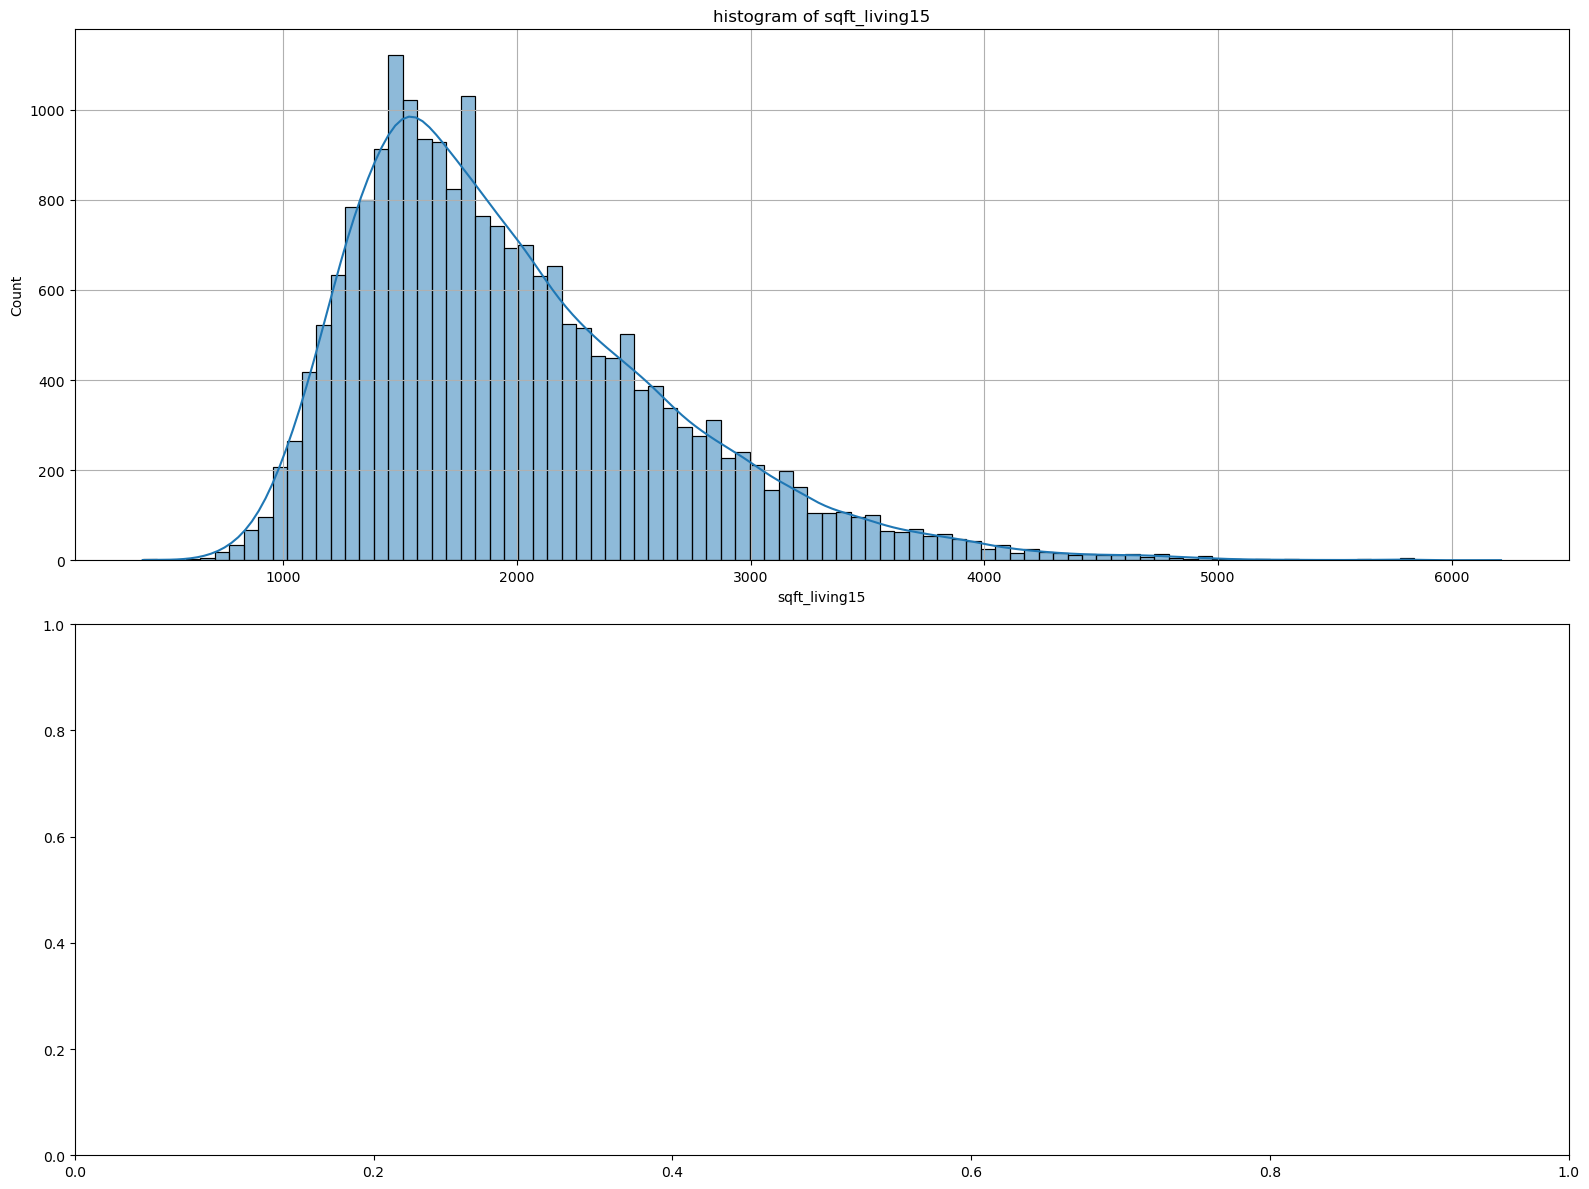

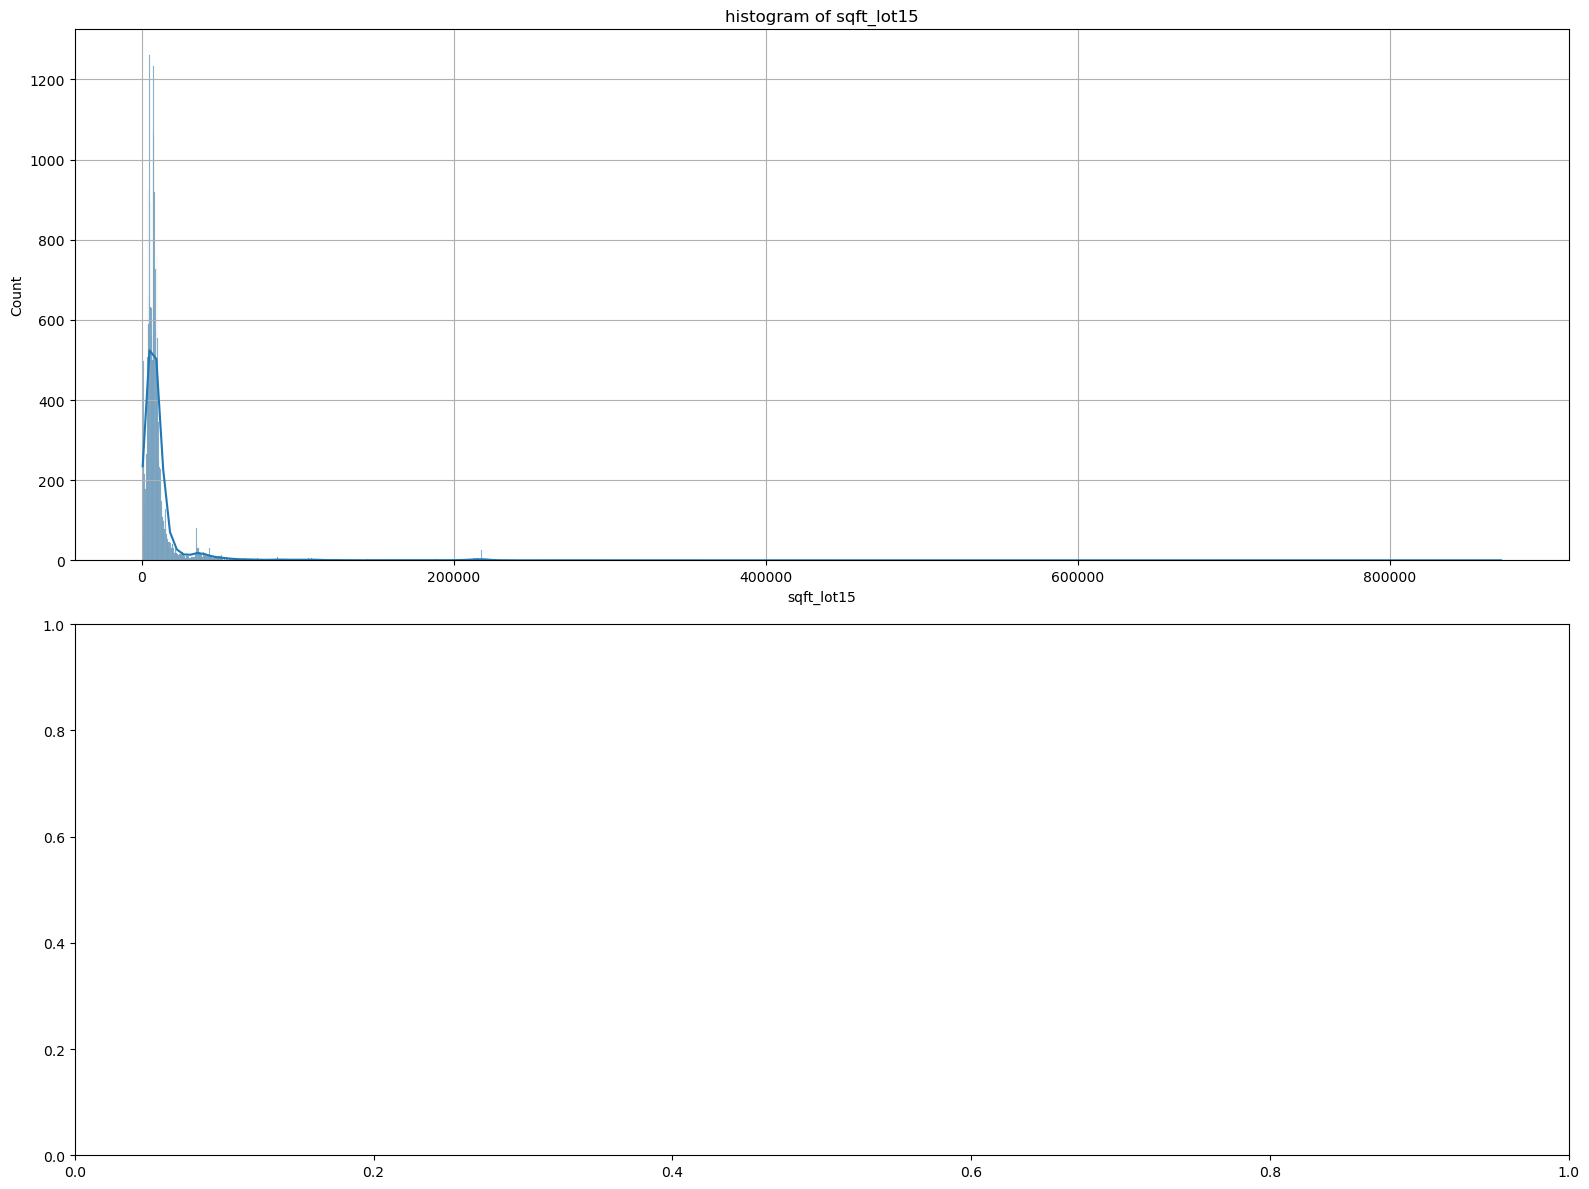

In [14]:
for col in df.columns:
      
    all_values = set(df[col])
    if len(all_values)<20:
        continue

    fig = plt.figure(figsize=(16,12))
    
    fig.add_subplot(2,1,1)
 #   plt.hist(df['price'], bins=100, rwidth= 0.5)
    sns.histplot(data=df, x=f"{col}", kde=True)

    plt.xlabel(col)
    plt.grid(True)
    plt.title(f"histogram of {col}")

    
    fig.add_subplot(2,1,2)
    try:
        sns.regplot(data=df, x=f"{col}", y='log_price', ci=99, marker="x", color=".3", line_kws=dict(color="r"))
        plt.xlabel(f'{col}')
        plt.grid(True)
        plt.title(f"displot of {col}")
    except:
        pass

    plt.tight_layout()



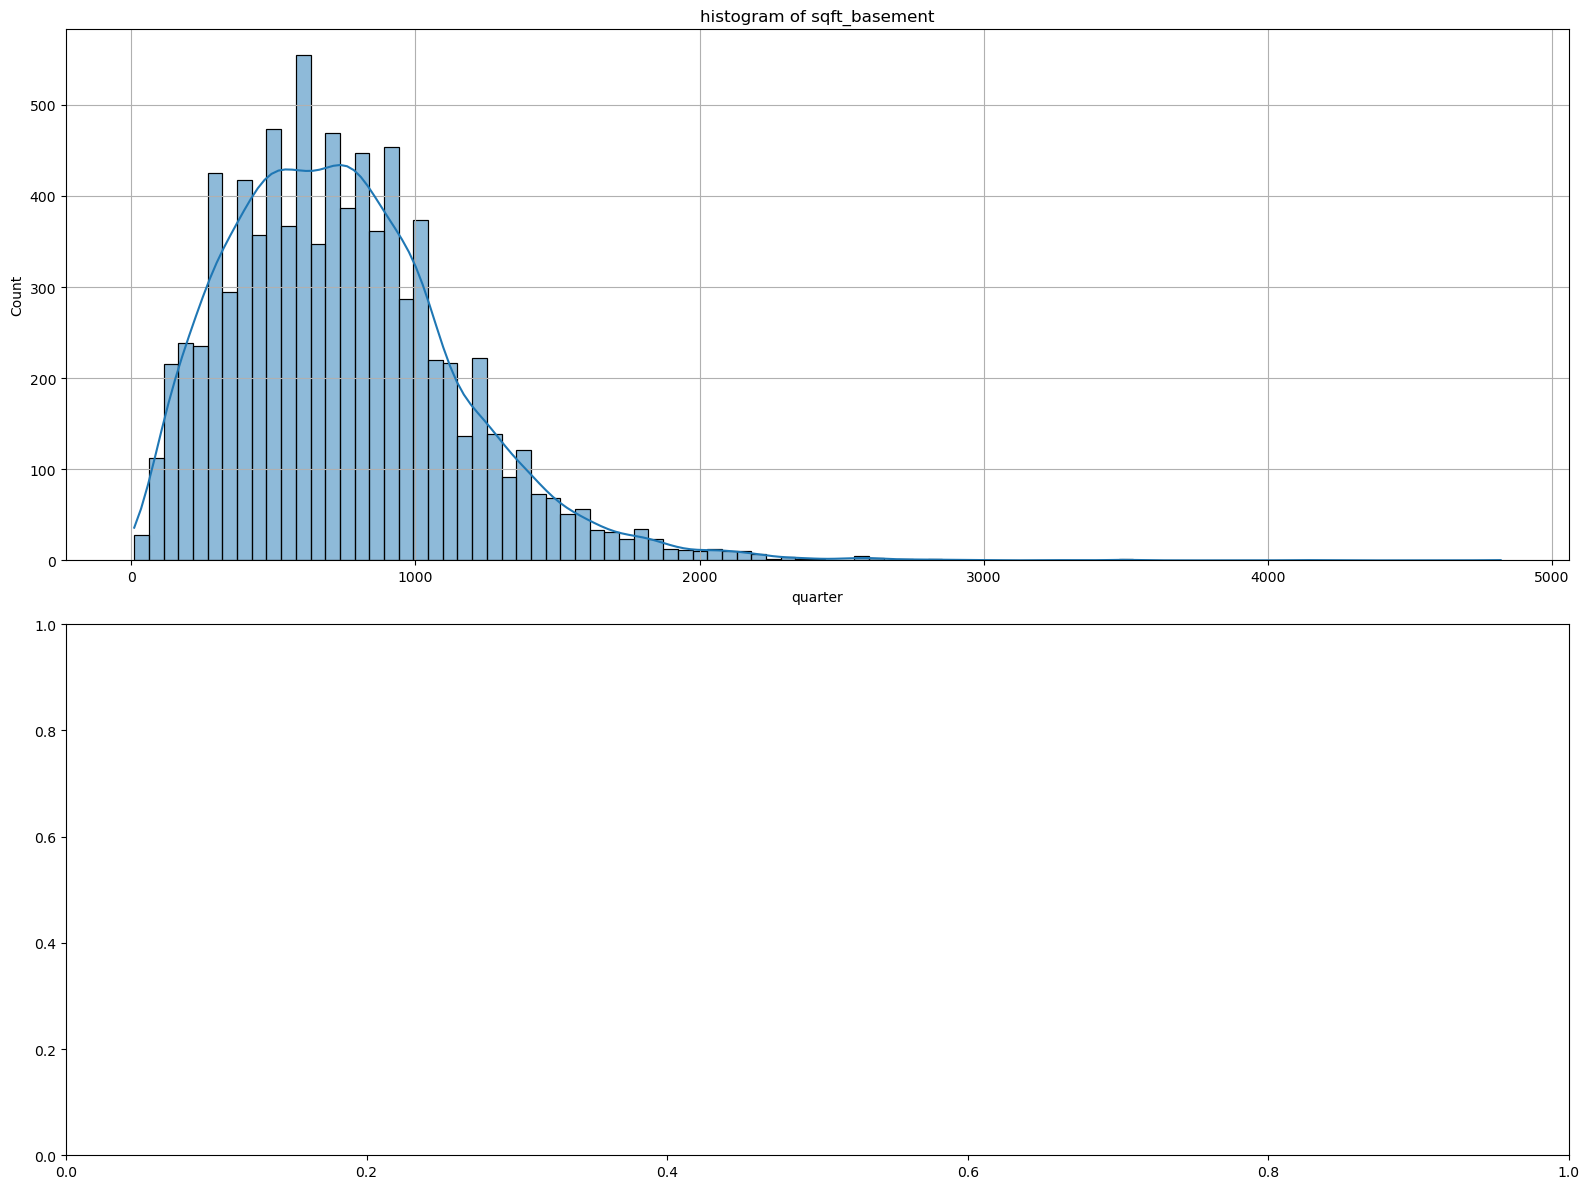

In [15]:
# pick up basement

column_of_interest = 'sqft_basement'

df_1 = df[df[column_of_interest]>0]

fig = plt.figure(figsize=(16,12))

fig.add_subplot(2,1,1)
#   plt.hist(df['price'], bins=100, rwidth= 0.5)
sns.histplot(data=df_1, x=f"{column_of_interest}", kde=True)

plt.xlabel(col)
plt.grid(True)
plt.title(f"histogram of {column_of_interest}")


fig.add_subplot(2,1,2)
try:
    sns.regplot(data=df_1, x=f"{column_of_interest}", y='log_price', ci=99, marker="x", color=".3", line_kws=dict(color="r"))
    plt.xlabel(f'{col}')
    plt.grid(True)
    plt.title(f"displot of {col}")
except:
    pass

plt.tight_layout()

# discrete variables

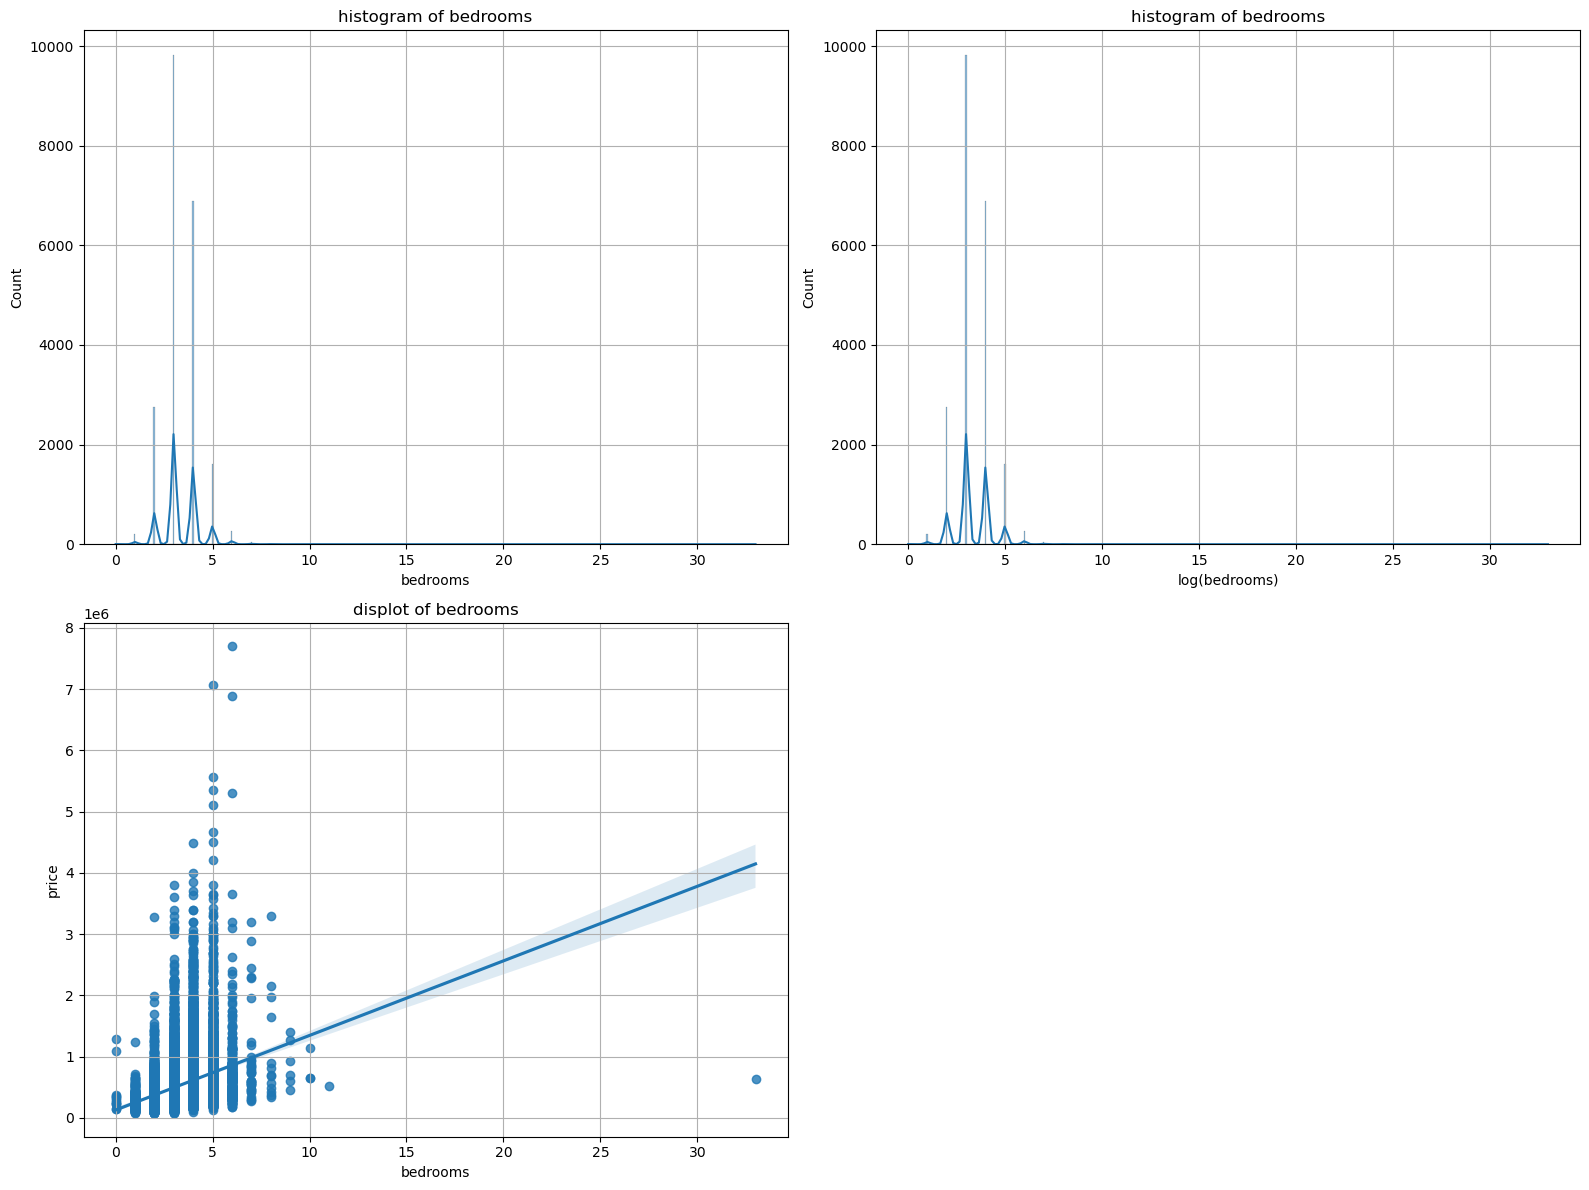

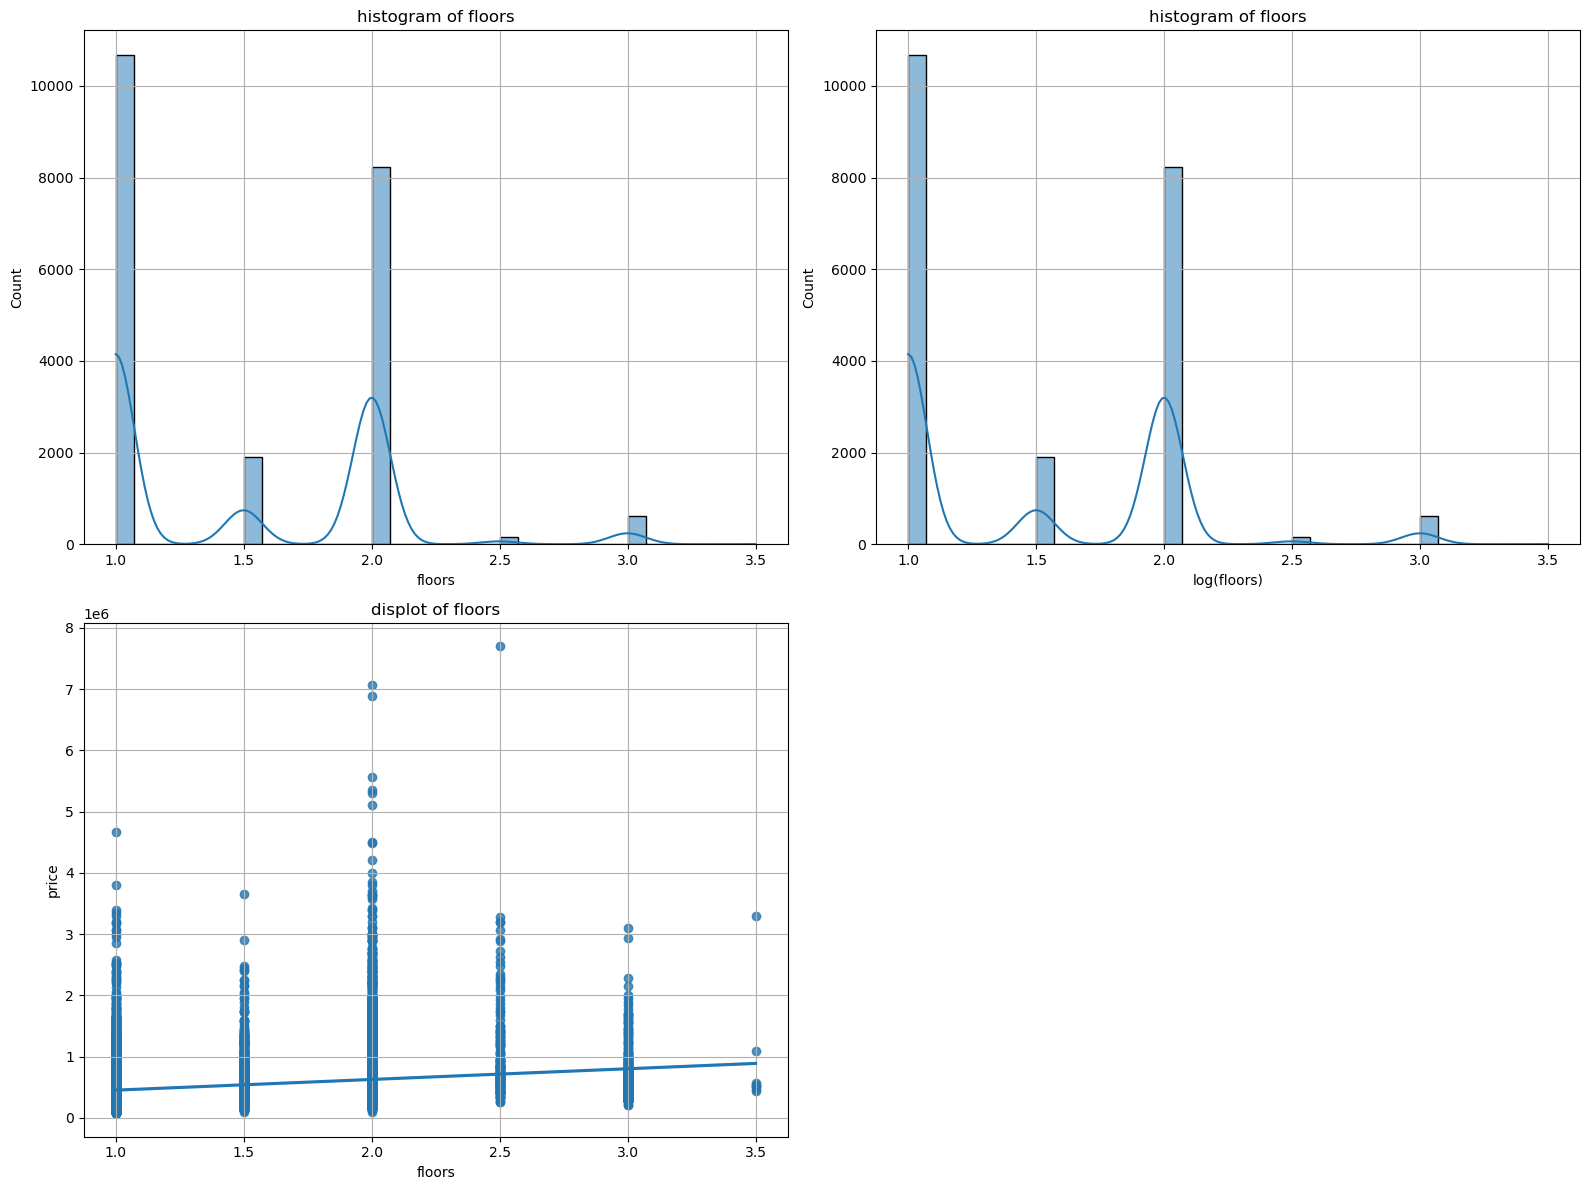

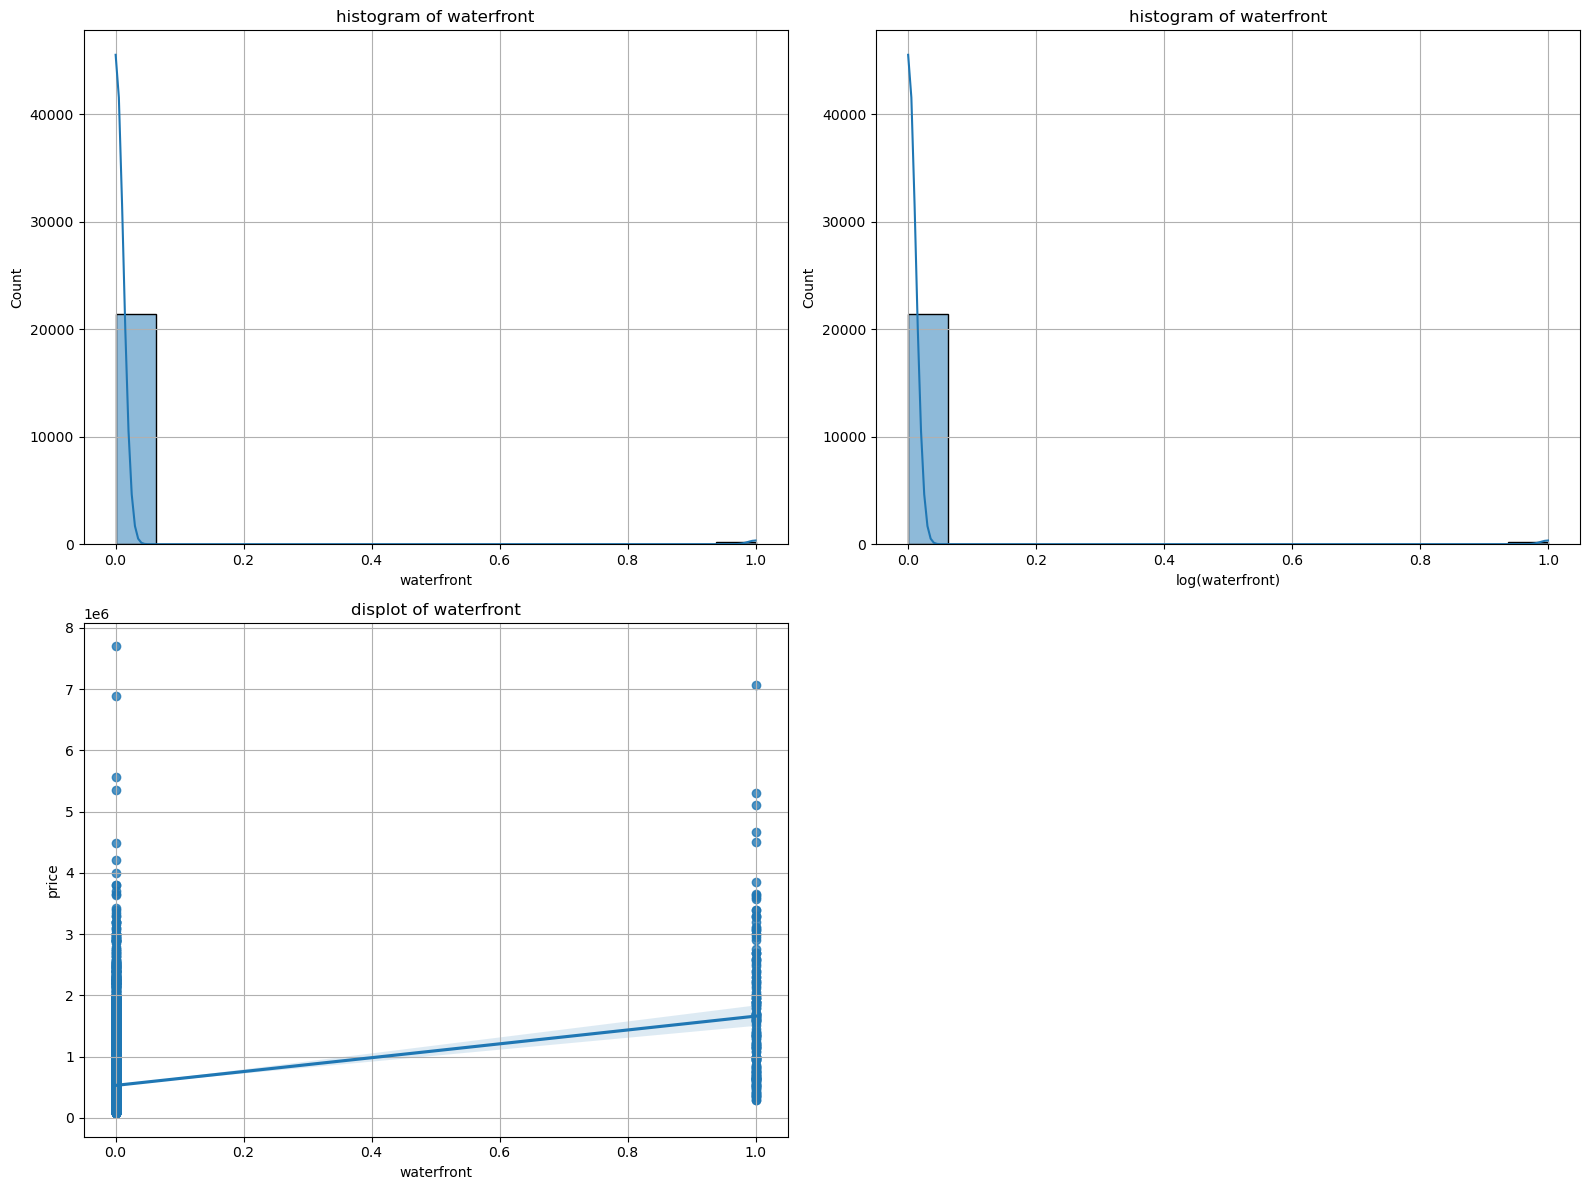

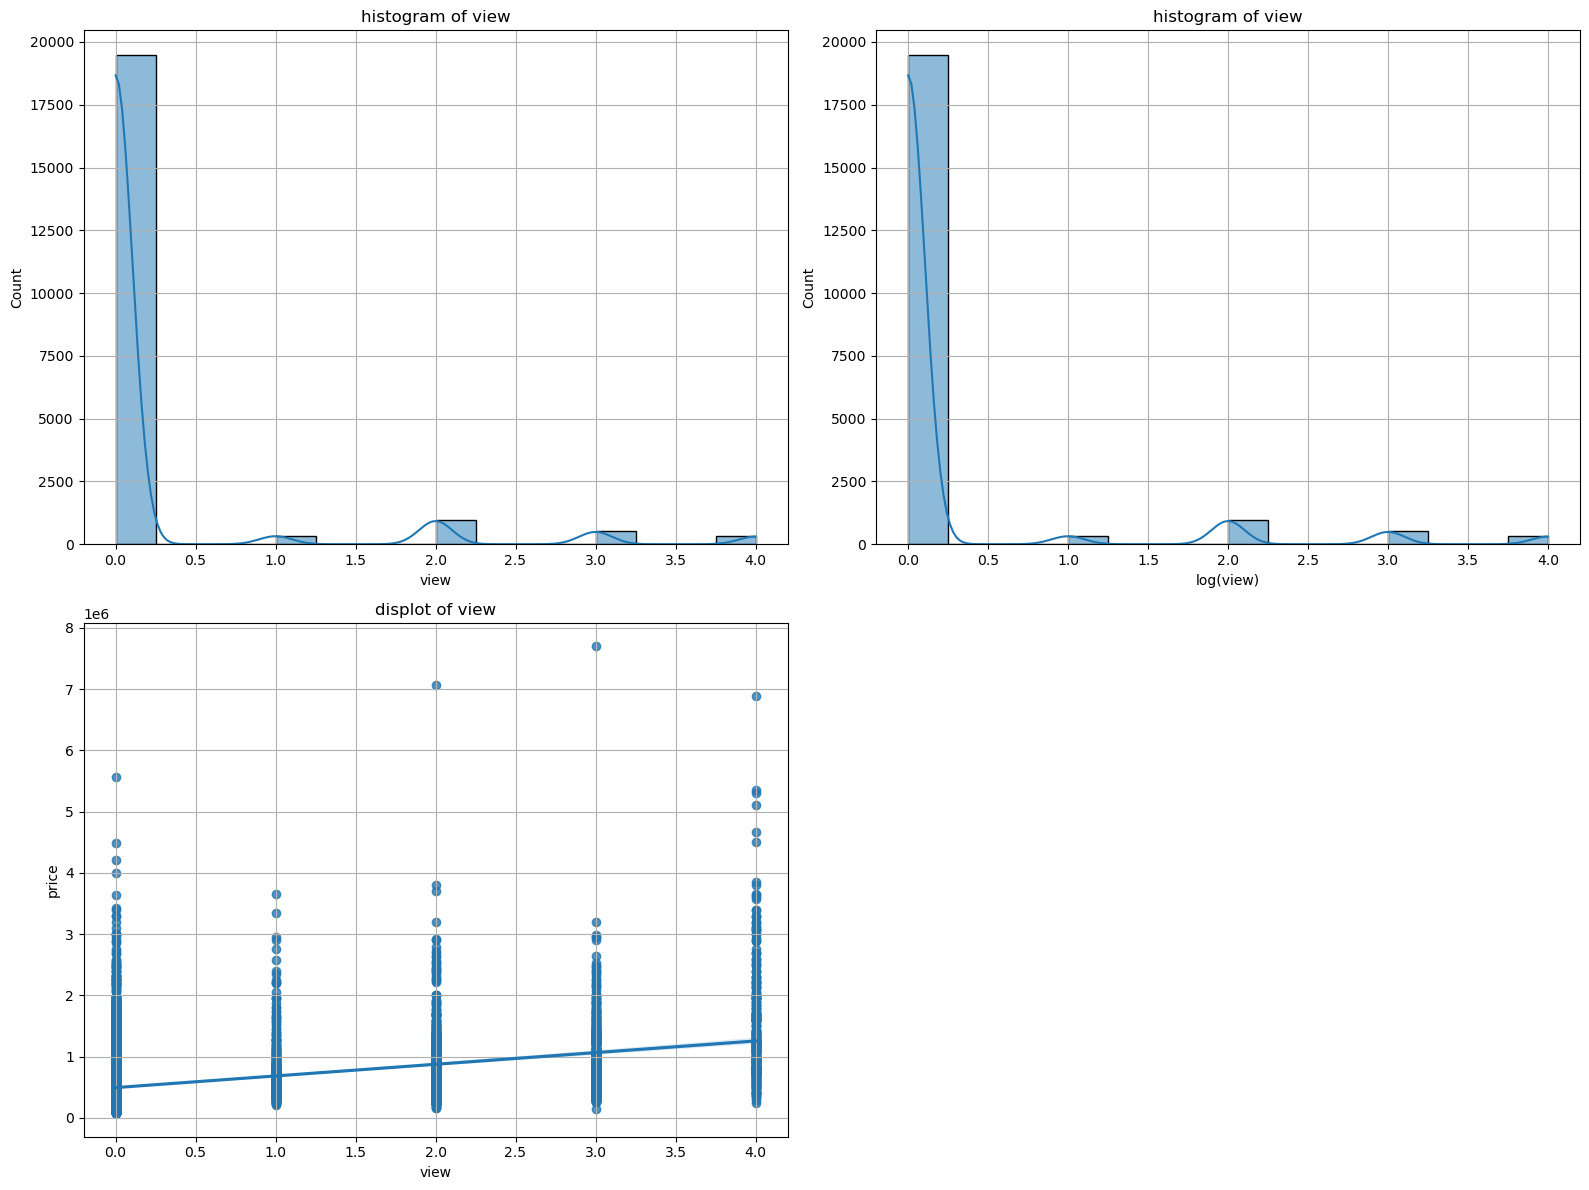

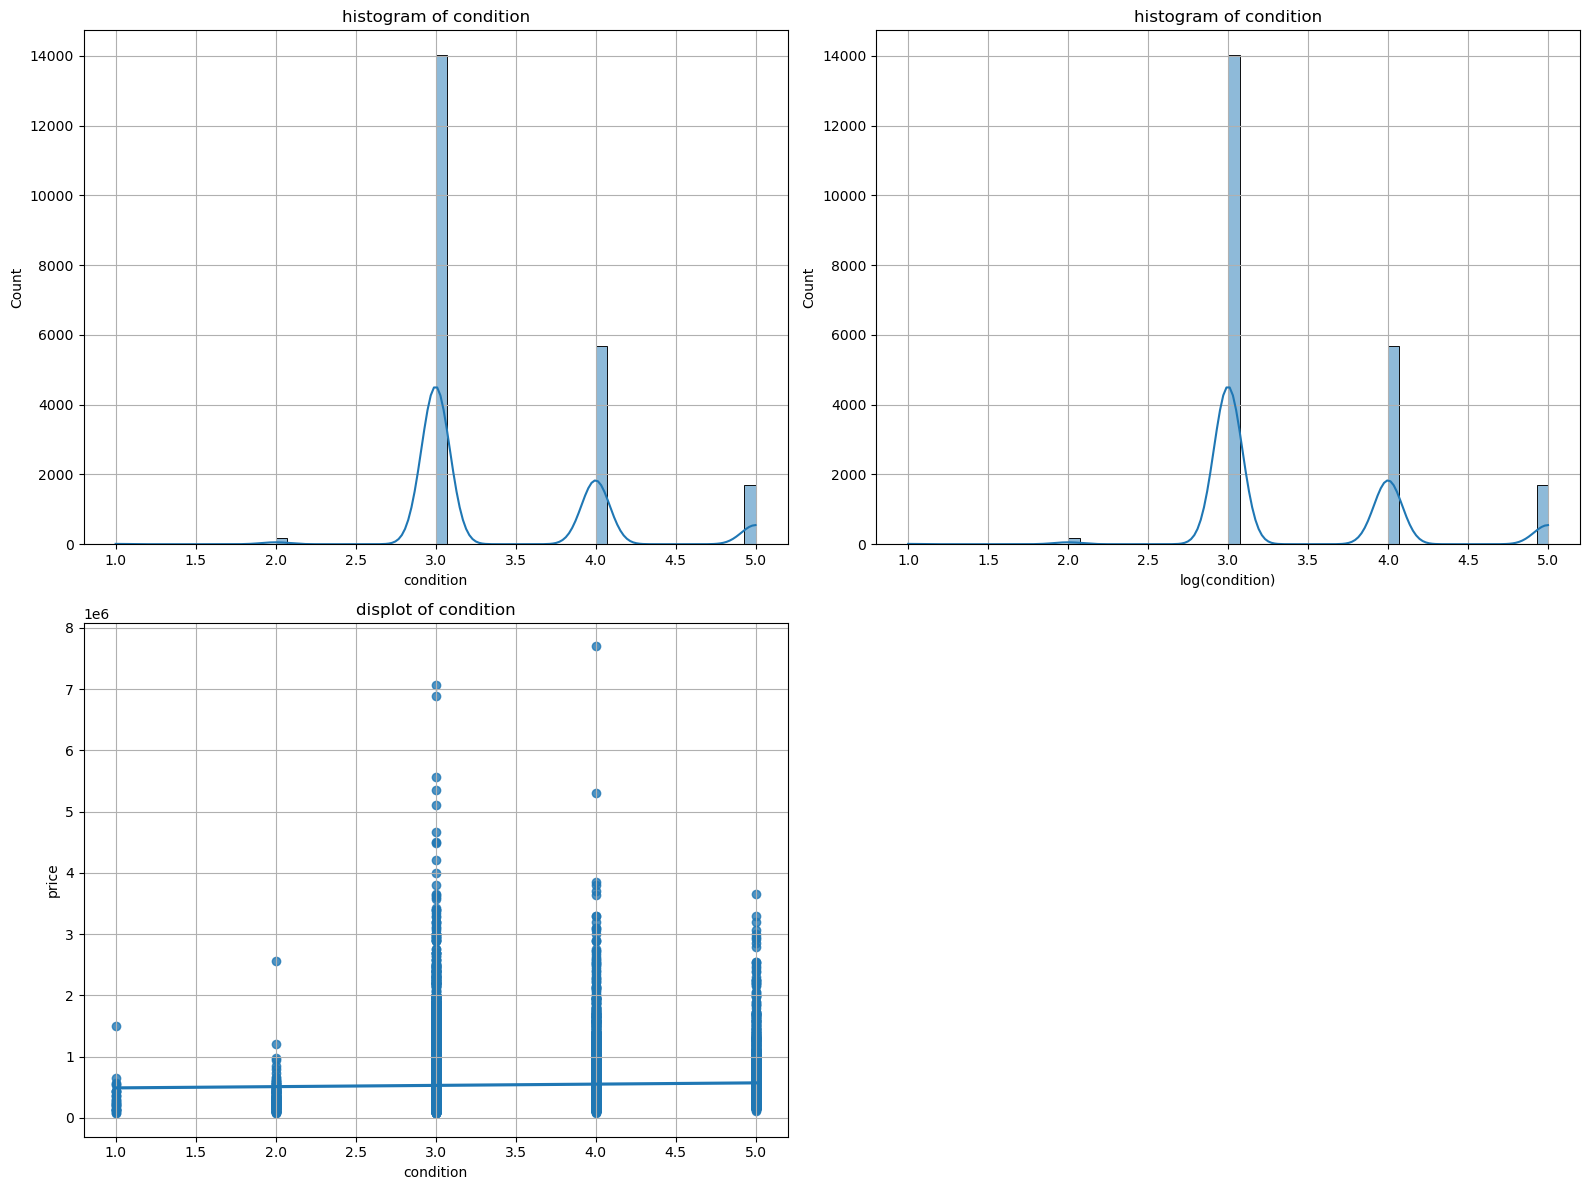

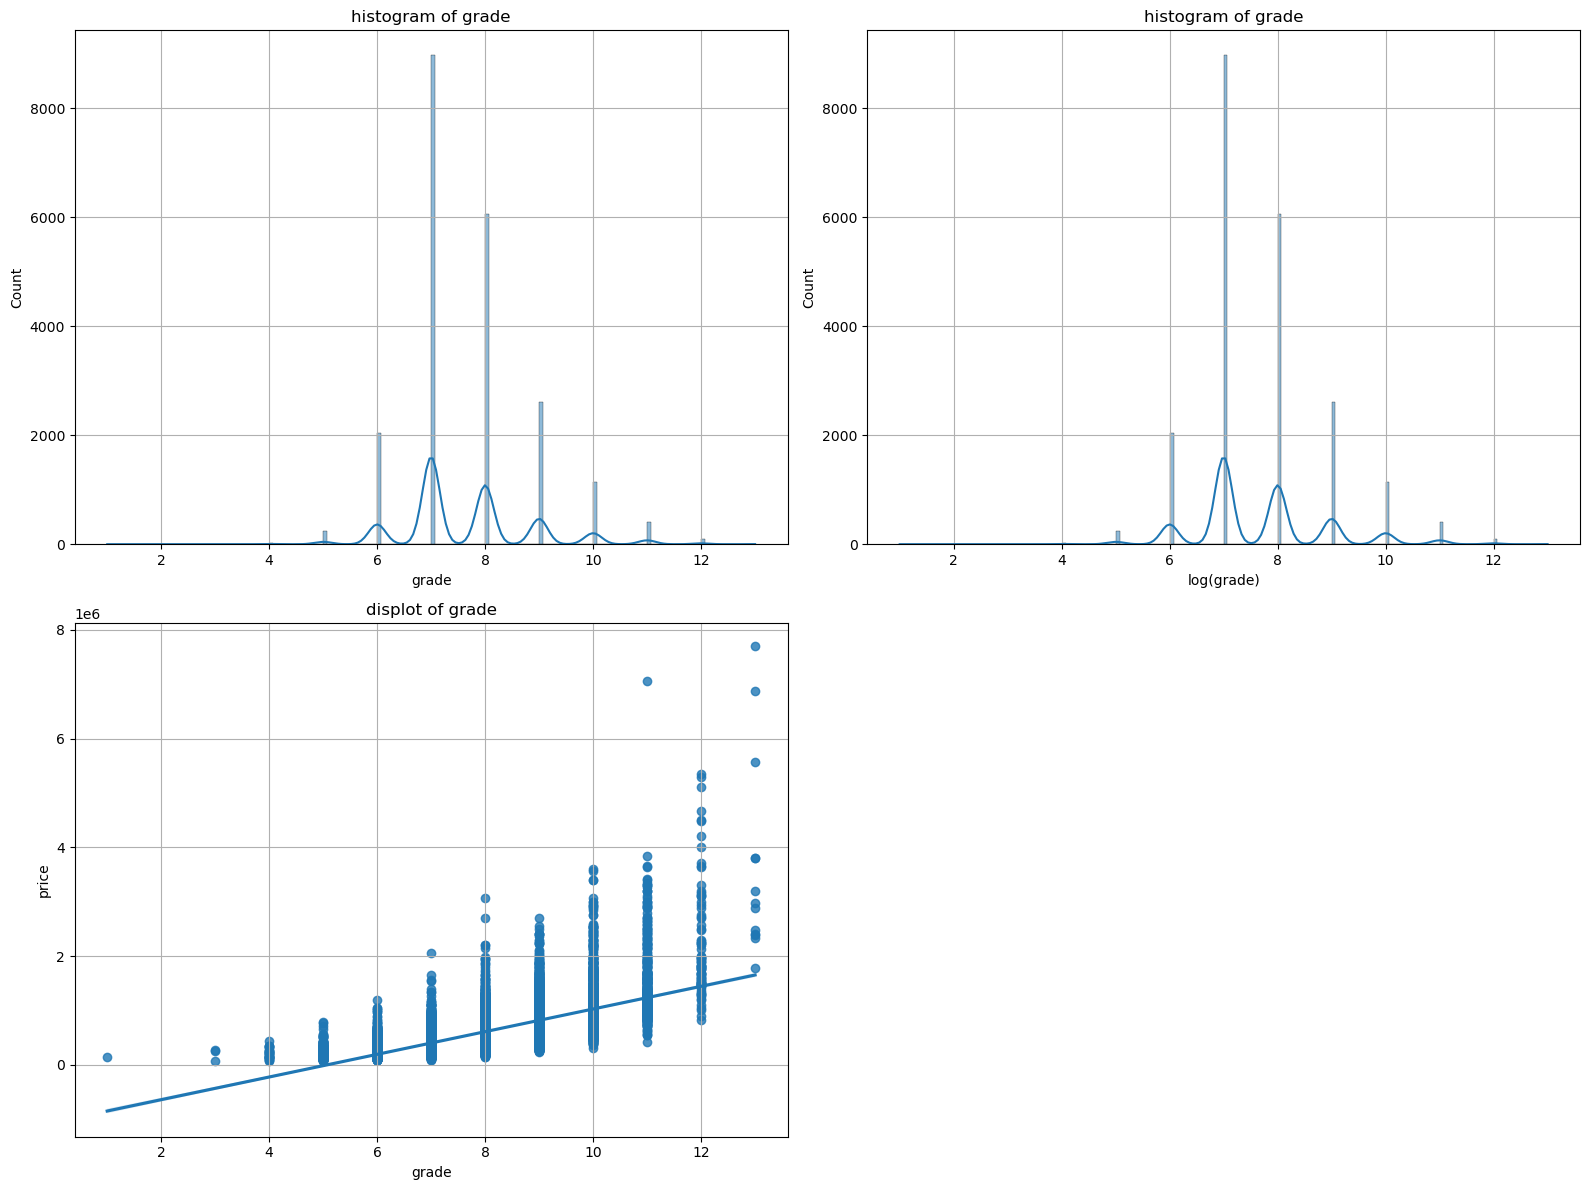

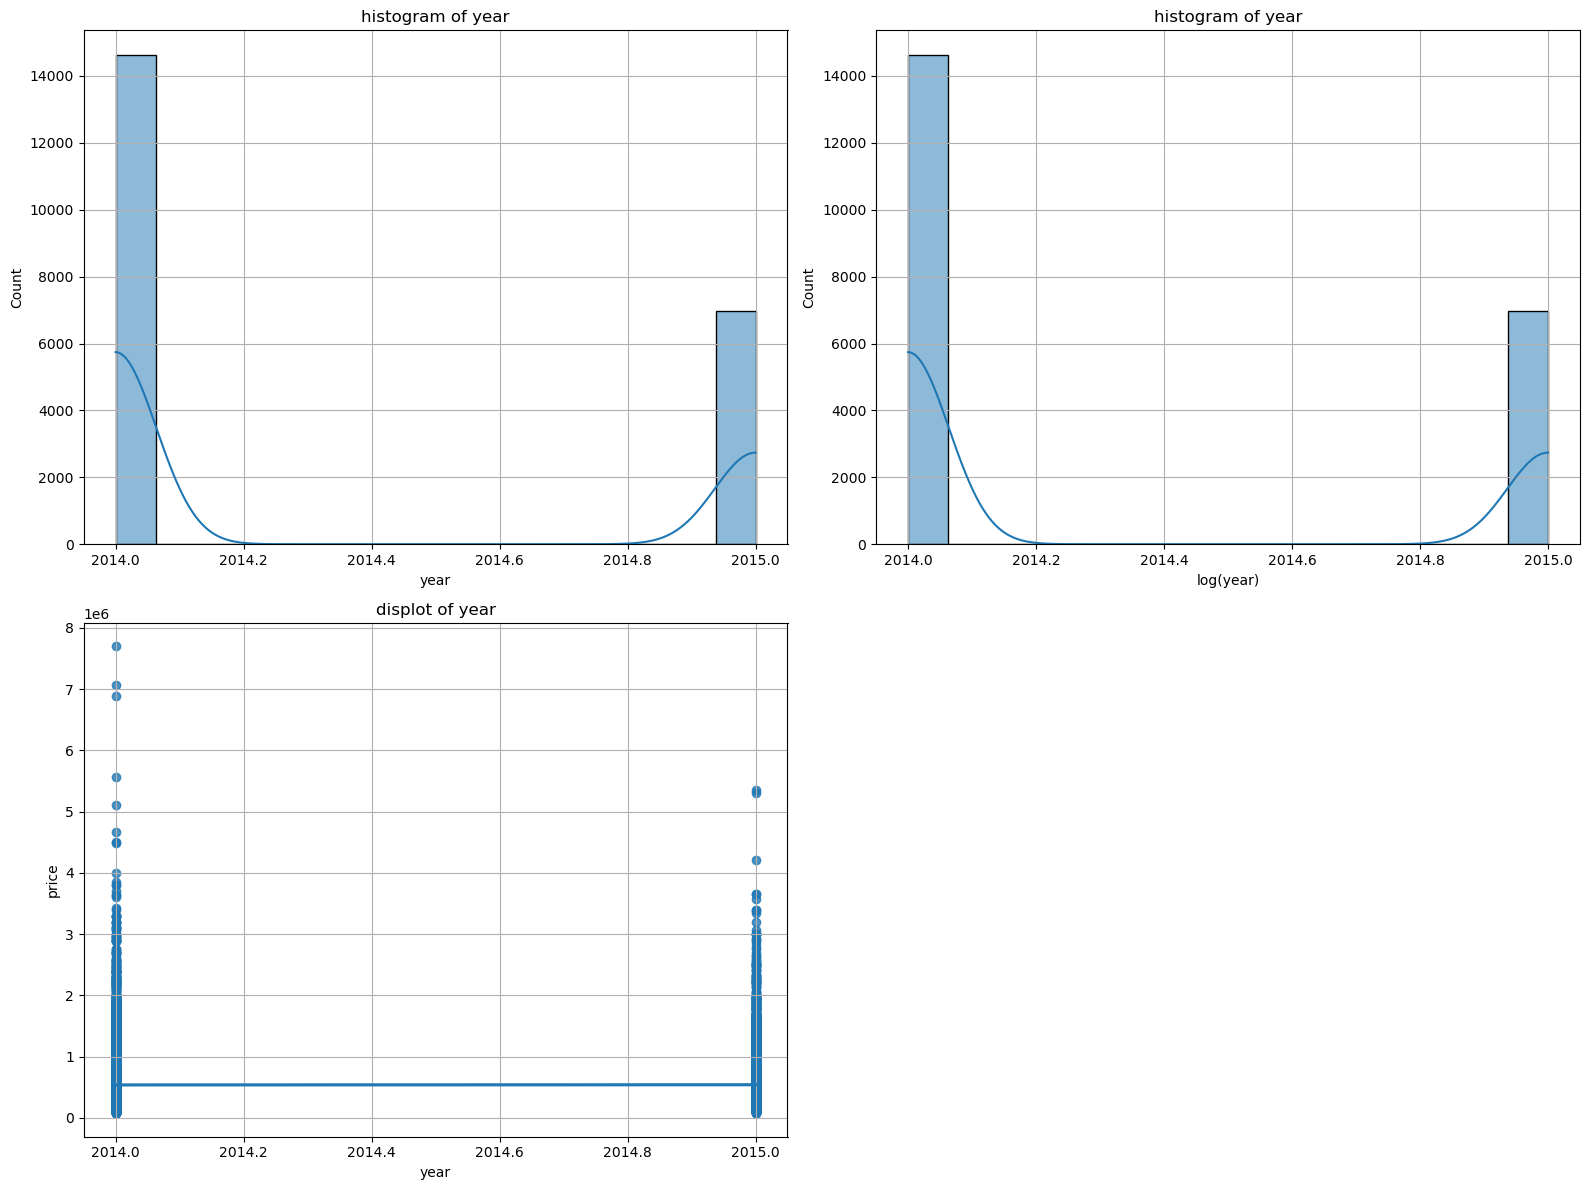

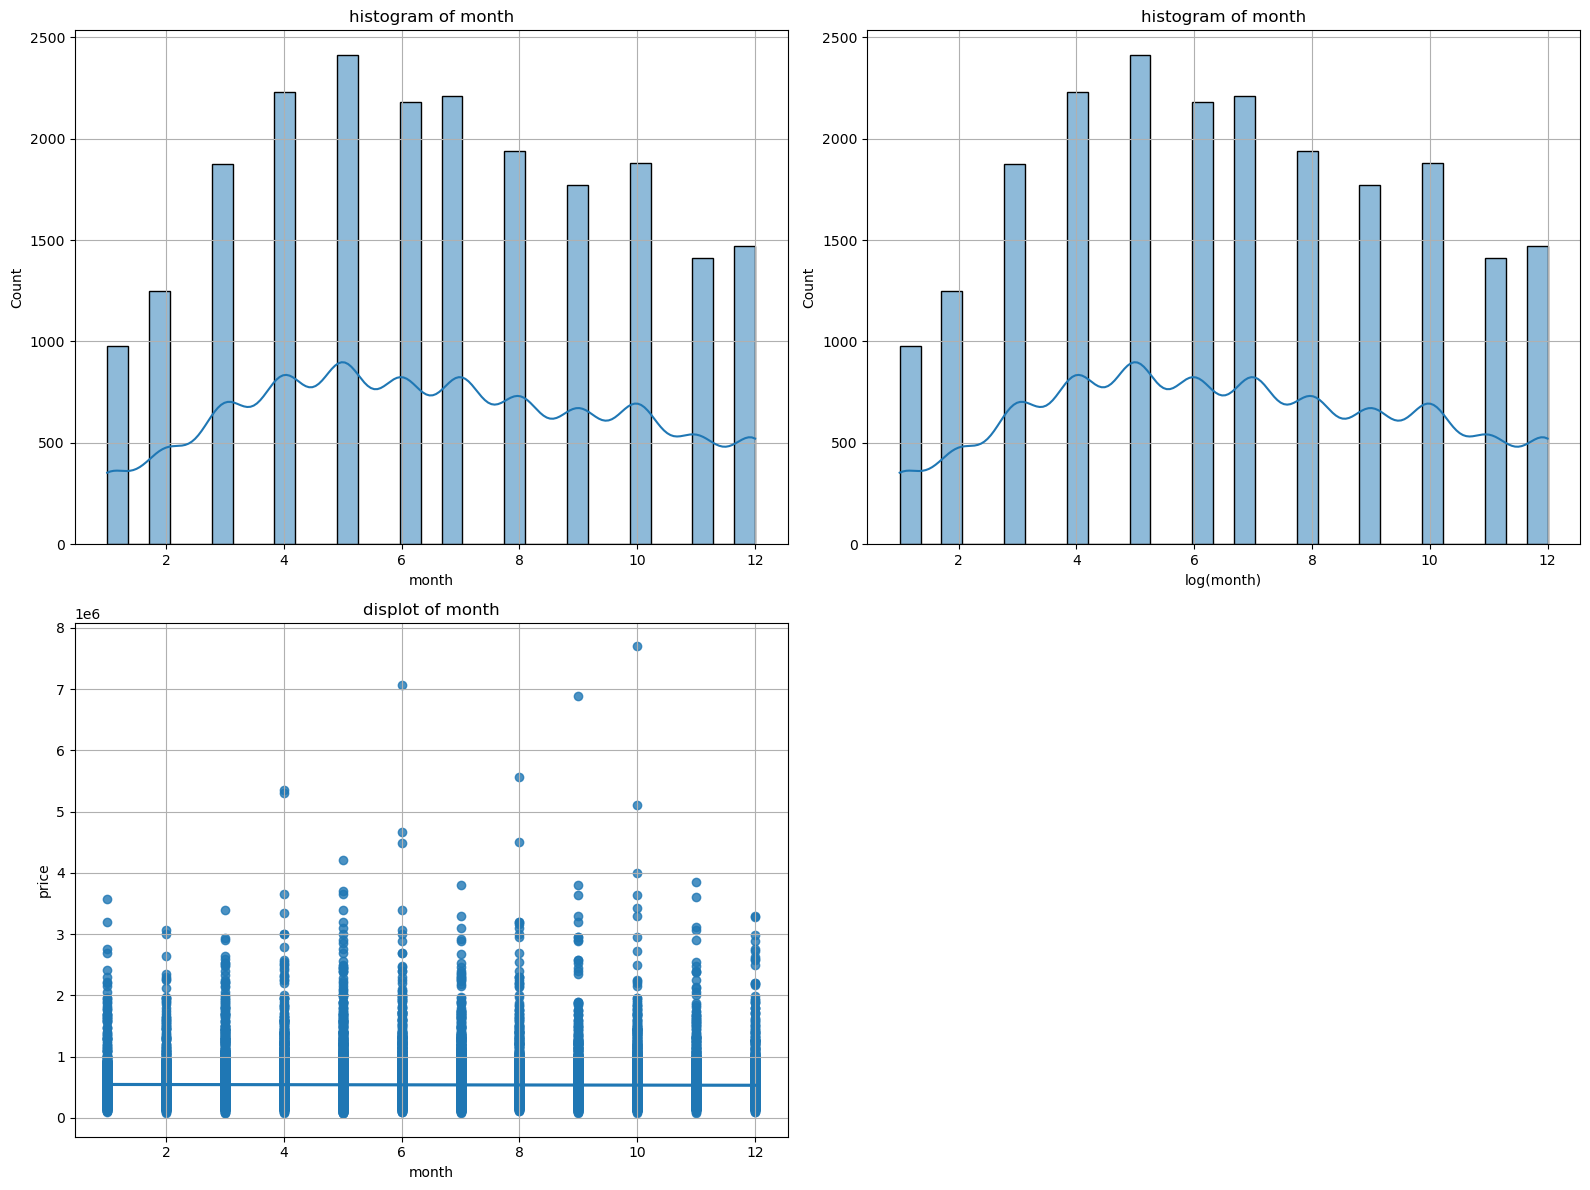

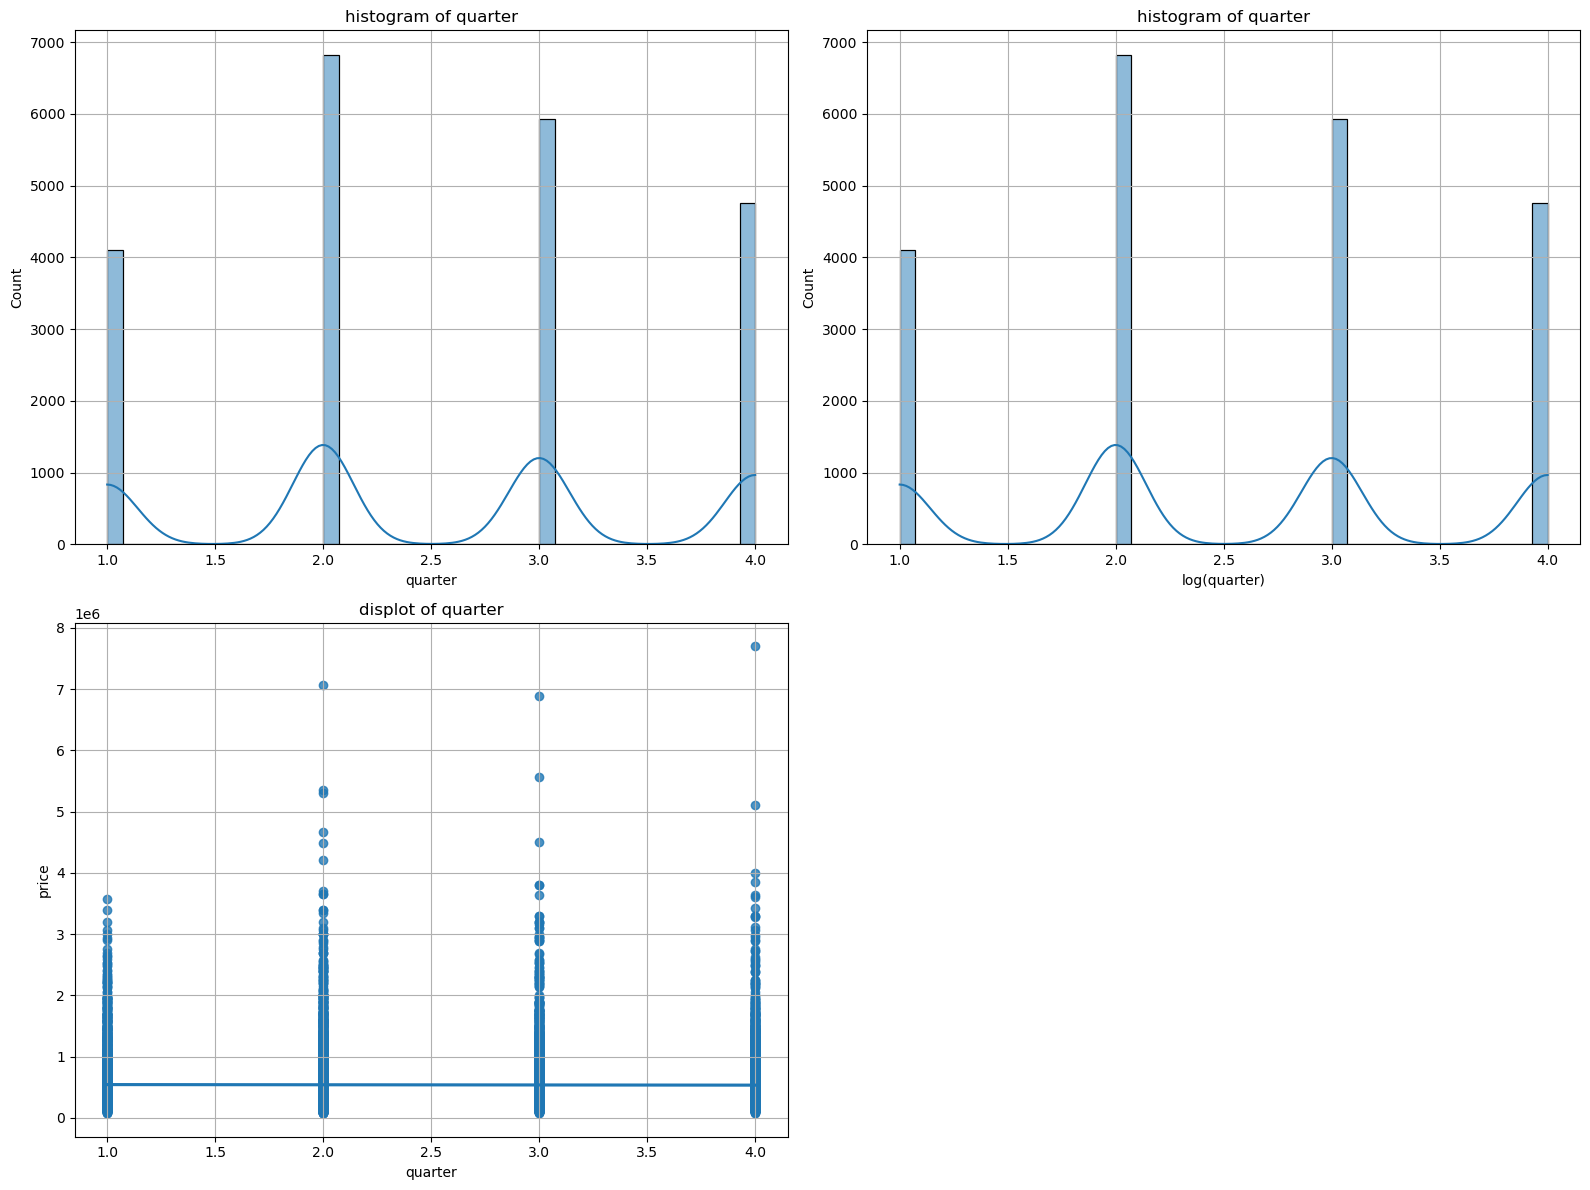

In [16]:
for col in df.columns:
      
    all_values = set(df[col])
    if len(all_values)>20:
        continue

    fig = plt.figure(figsize=(16,12))
    fig.add_subplot(2,2,1)
 #   plt.hist(df['price'], bins=100, rwidth= 0.5)
    sns.histplot(data=df, x=f"{col}", kde=True)

    plt.xlabel(col)
    plt.grid(True)
    plt.title(f"histogram of {col}")

    fig.add_subplot(2,2, 2)
    try:
        sns.histplot(data=df, x=f"{col}", kde=True, )
        plt.xlabel(f'log({col})')
        plt.grid(True)
        plt.title(f"histogram of {col}")
    except:
        pass

    fig.add_subplot(2, 2, 3)
    sns.regplot(data=df, x=f"{col}", y='price')
    plt.xlabel(f'{col}')
    plt.grid(True)
    plt.title(f"displot of {col}")


    plt.tight_layout()



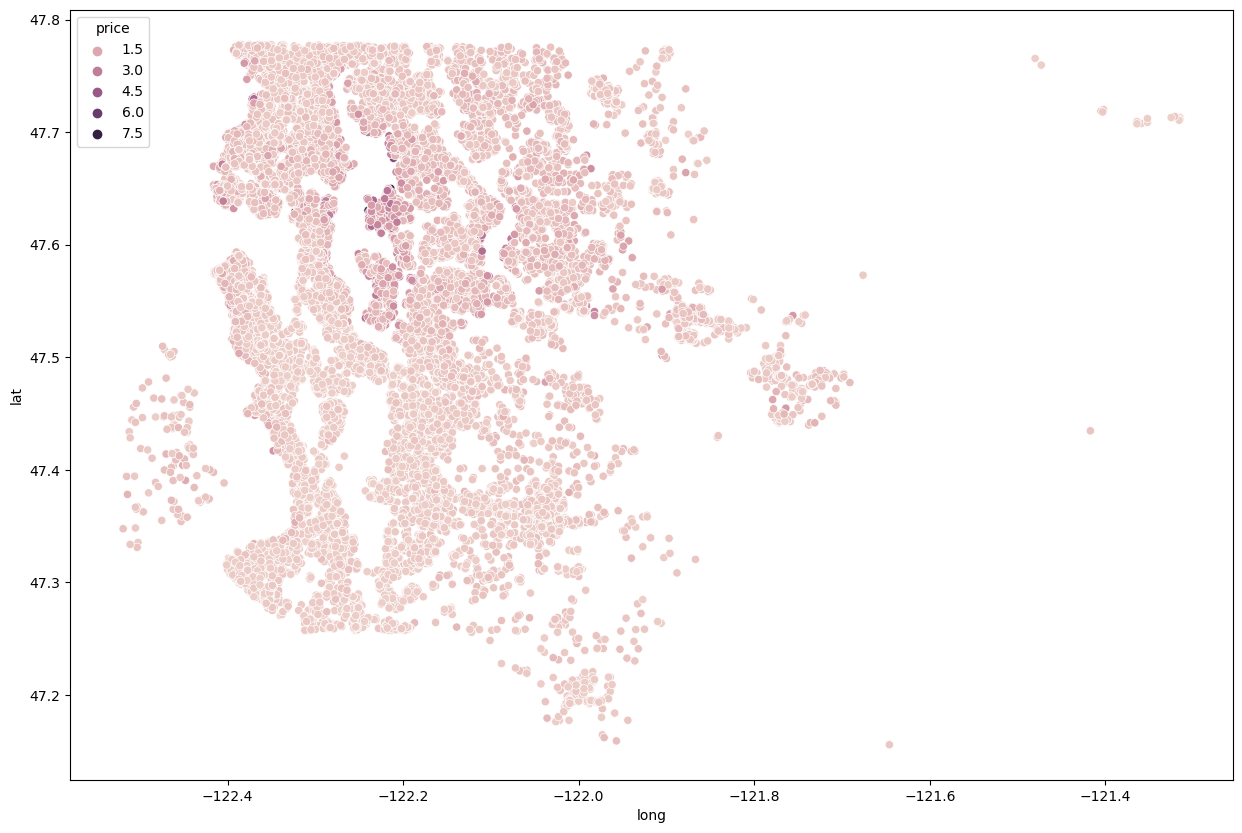

In [17]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=df, hue='price')
plt.show()

# correlation matrix

In [18]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
quarter         -0.008543
month           -0.010081
zipcode         -0.053203
Name: price, dtype: float64

<AxesSubplot:>

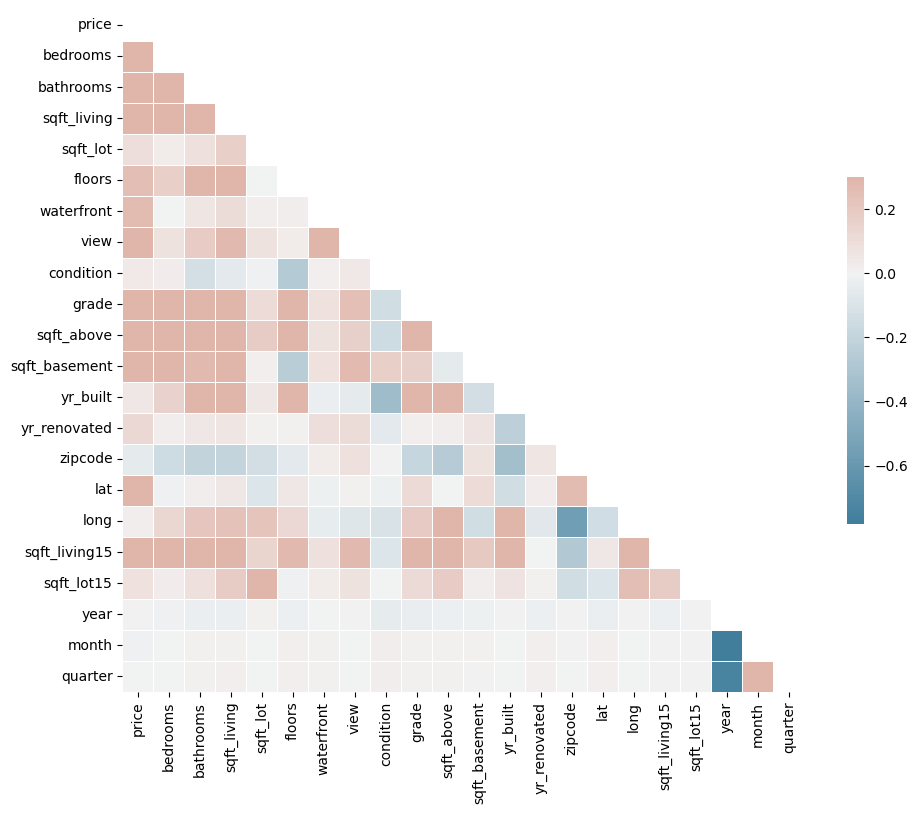

In [19]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# convertion of some data to log scale

df['log_price'] = np.log10(df['price'])


# data preparation

In [21]:
def prepare_training_data(df):
    X = df.drop(['price'],axis =1).values
    y = df['price'].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

    # normalize
    from sklearn.preprocessing import StandardScaler
    s_scaler = StandardScaler()
    X_train = s_scaler.fit_transform(X_train.astype(float))
    X_test = s_scaler.transform(X_test.astype(float))

    return X_train, X_test, y_train, y_test

def convert_df_to_np_data(df):
    X = df.drop(['price'],axis =1).values
    y = df['price'].values

    # normalize
    from sklearn.preprocessing import StandardScaler
    s_scaler = StandardScaler()
    X = s_scaler.fit_transform(X.astype(float))
    
    return X, y


In [22]:
log_scale = 0

def compute_ppe10(df_input, log_scale=0):
    
    stat_ppe10={}
    
    if log_scale:
        df_input['predicted'] = np.power(10, df_input['predicted'])
        df_input['soldprice'] = np.power(10, df_input['soldprice'])

    df_input['error'] = (df_input['predicted']-df_input['soldprice'])/df_input['soldprice']

    f1 = np.abs(df_input['error'])<=0.1
    
    ppe10 = round(len(df_input[f1])/len(df_input)*100,2)

    return ppe10


def compute_stat(model, X_train, X_test, y_train, y_test, dl_model_flag=0):
    
    stats = {}
    
    if dl_model_flag==1:
        y_pred_1 = model.predict(X_train)[:,0]
        y_pred_2 = model.predict(X_test)[:,0]
    else:
        y_pred_1 = model.predict(X_train)
        y_pred_2 = model.predict(X_test)
    #st.write(y_pred)
    df_train= pd.DataFrame({'soldprice': y_train})
    df_train['predicted'] =  y_pred_1

    #evaluate the model (intercept and slope)
    
    df_test = pd.DataFrame({'soldprice': y_test})
    df_test['predicted'] = y_pred_2

    stats['train_ppe10'] = compute_ppe10(df_train)
    stats['test_ppe10'] = compute_ppe10(df_test)
    
    try:
        stats['train_score'] = round(model.score(X_train,y_train), 2)
        stats['test_score']  = round(model.score(X_test, y_test), 2)
        return pd.DataFrame([stats])
    except:
        pass
    
    return pd.DataFrame([stats])
    

In [23]:

X_train, X_test, y_train, y_test = prepare_training_data(df)


# Liner Regression

In [24]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()  
lr_model.fit(X_train, y_train)

df_result = compute_stat(lr_model,  X_train, X_test, y_train, y_test)
df_result.insert(0,'algorithm', 'linear regression')
print(df_result.transpose())

df_all_result = pd.DataFrame()

df_all_result = pd.concat([df_all_result, df_result])
print(df_all_result)

                             0
algorithm    linear regression
train_ppe10              43.27
test_ppe10               43.65
train_score               0.83
test_score                0.87
           algorithm  train_ppe10  test_ppe10  train_score  test_score
0  linear regression        43.27       43.65         0.83        0.87


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=500)  
rf_model.fit(X_train, y_train)

df_result = compute_stat(rf_model,  X_train, X_test, y_train, y_test)
df_result.insert(0, 'algorithm', 'random forest')
print(df_result.transpose())

# append result
df_all_result = pd.concat([df_all_result, df_result])
print(df_all_result)

                         0
algorithm    random forest
train_ppe10          100.0
test_ppe10           100.0
train_score            1.0
test_score             1.0
           algorithm  train_ppe10  test_ppe10  train_score  test_score
0  linear regression        43.27       43.65         0.83        0.87
0      random forest       100.00      100.00         1.00        1.00


# GAM Model

In [26]:
from pygam import LinearGAM
#gam = LinearGAM().fit(X, y)
#gam = LinearGAM().gridsearch(X_train, y_train)
gam_model = LinearGAM(n_splines=10).gridsearch(X_train, y_train)

df_result = compute_stat(gam_model,  X_train, X_test, y_train, y_test)
df_result.insert(0, 'algorithm', 'GAM')
print(df_result.transpose())

# append result
df_all_result = pd.concat([df_all_result, df_result])
print(df_all_result)


100% (11 of 11) |########################| Elapsed Time: 0:00:29 Time:  0:00:29


                 0
algorithm      GAM
train_ppe10  100.0
test_ppe10   100.0
train_score    1.0
test_score     1.0
           algorithm  train_ppe10  test_ppe10  train_score  test_score
0  linear regression        43.27       43.65         0.83        0.87
0      random forest       100.00      100.00         1.00        1.00
0                GAM       100.00      100.00         1.00        1.00


# CATBOOST

In [27]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=100,
                          learning_rate=0.05)
# Fit model
catboost_model.fit(X_train, y_train)
# Get prediction errors

df_result = compute_stat(catboost_model,  X_train, X_test, y_train, y_test)


0:	learn: 356833.7042610	total: 215ms	remaining: 21.3s
1:	learn: 342488.9561880	total: 225ms	remaining: 11s
2:	learn: 327149.4130511	total: 234ms	remaining: 7.58s
3:	learn: 312720.1212964	total: 243ms	remaining: 5.82s
4:	learn: 300388.3196643	total: 252ms	remaining: 4.78s
5:	learn: 287315.3517649	total: 259ms	remaining: 4.07s
6:	learn: 275276.1735515	total: 268ms	remaining: 3.56s
7:	learn: 263561.3152498	total: 277ms	remaining: 3.19s
8:	learn: 252281.2237951	total: 286ms	remaining: 2.89s
9:	learn: 242231.0338210	total: 294ms	remaining: 2.64s
10:	learn: 232510.1022591	total: 302ms	remaining: 2.44s
11:	learn: 222841.6998002	total: 311ms	remaining: 2.28s
12:	learn: 213563.0693993	total: 319ms	remaining: 2.13s
13:	learn: 205017.6551253	total: 327ms	remaining: 2.01s
14:	learn: 196914.2112177	total: 335ms	remaining: 1.9s
15:	learn: 189215.2345831	total: 343ms	remaining: 1.8s
16:	learn: 181652.9186410	total: 352ms	remaining: 1.72s
17:	learn: 174755.9573212	total: 361ms	remaining: 1.64s
18:	le

In [28]:
df_result.insert(0, 'algorithm', 'catboost')
print(df_result.transpose())

# append result
df_all_result = pd.concat([df_all_result, df_result])

print(df_all_result)

                    0
algorithm    catboost
train_ppe10     96.29
test_ppe10      96.67
train_score      0.99
test_score        1.0
           algorithm  train_ppe10  test_ppe10  train_score  test_score
0  linear regression        43.27       43.65         0.83        0.87
0      random forest       100.00      100.00         1.00        1.00
0                GAM       100.00      100.00         1.00        1.00
0           catboost        96.29       96.67         0.99        1.00


# xgboost

In [29]:
def train_xgboost_model( X_train, X_test, y_train, y_test):
    import xgboost as xgb
    dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
    dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)
    # Define hyperparameters
    params = {"objective": "reg:squarederror", "tree_method": "hist"}

    n = 100
    xgboost_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    )

    y_pred = xgboost_model.predict(dtrain_reg)
    df_train= pd.DataFrame({'soldprice': y_train})
    df_train['predicted'] =  y_pred

    #evaluate the model (intercept and slope)
    y_pred = xgboost_model.predict(dtest_reg)
    df_test = pd.DataFrame({'soldprice': y_test})
    df_test['predicted'] = y_pred

    stats = {}
    stats['train_ppe10'] = compute_ppe10(df_train)
    stats['test_ppe10'] = compute_ppe10(df_test)

    try:
        stats['train_score'] = round(xgboost_model.score(X_train,y_train), 2)
        stats['test_score'] = round(xgboost_model.score(X_test, y_test), 2)
    except:
        pass
              
    return pd.DataFrame([stats])

df_result = train_xgboost_model( X_train, X_test, y_train, y_test)


df_result.insert(0, 'algorithm', 'xgboost')
print(df_result.transpose())

# add result
df_all_result = pd.concat([df_all_result, df_result])

print(df_all_result)



                   0
algorithm    xgboost
train_ppe10    99.99
test_ppe10     99.86
           algorithm  train_ppe10  test_ppe10  train_score  test_score
0  linear regression        43.27       43.65         0.83        0.87
0      random forest       100.00      100.00         1.00        1.00
0                GAM       100.00      100.00         1.00        1.00
0           catboost        96.29       96.67         0.99        1.00
0            xgboost        99.99       99.86          NaN         NaN


# Deep Learning Model

In [ ]:
def train_dl_model(X_train, X_test, y_train, y_test):

    # Creating a Neural Network Model
    from keras.models import Sequential
    from keras.layers import Dense, Activation, Dropout

    import os
    import tensorflow as tf
    #os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" #If the line below doesn't work, uncomment this line (make sure to comment the line below); it should help.
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

    dl_model = Sequential()

    input_dimesion = len(df)-1

    dl_model.add(Dense(input_dimesion, activation='relu'))
    dl_model.add(Dropout(0.2))
                 
    dl_model.add(Dense(input_dimesion, activation='relu'))
    dl_model.add(Dropout(0.2))
                 
    dl_model.add(Dense(input_dimesion, activation='relu'))
    dl_model.add(Dropout(0.2))
                 
    dl_model.add(Dense(input_dimesion, activation='relu'))
    dl_model.add(Dense(1))

    dl_model.compile(optimizer='adam',loss='mse')

    #st.write(X_train.shape)

    dl_model.fit(x=X_train,y=y_train,
            validation_data=(X_test,y_test),
            batch_size=64, 
            epochs=20)

    loss_df = pd.DataFrame(dl_model.history.history)
    fig = plt.figure()
    plt.plot(loss_df)
    plt.grid(True)
    plt.title('loss function')
    

    return dl_model

foundation_dl_model = train_dl_model(X_train, X_test, y_train, y_test)

Epoch 1/20
  5/271 [..............................] - ETA: 5:10:30 - loss: 322210168832.0000

In [ ]:


df_result = compute_stat(foundation_dl_model,  X_train, X_test, y_train, y_test, 1)

df_result.insert(0, 'algorithm', 'deep learning')
print(df_result.transpose())

# add result
df_all_result = pd.concat([df_all_result, df_result])

print(df_all_result)